<h1>Some introduction to likelihood formalism</h1>
<h3>Typically, I would start with "how to fit a line", but since you know that, I start with "what actually is a likelihood?":<br><br>
    A likelihood $\mathscr{L}(D|M)$ ('$D$ given $M$') describes the probability of measuring data $D$ when your expectation (model) is $M$.<br>
    So, in case of our photon counting experiment, we ask: "how likely is it to measure $d$ counts (per time, per energy bin, per angle bin, per whatever) when my model suggests $m$ counts?". Now, if we keep it at "per time" to make things easier to understand, we measure $d$ counts in time interval $\Delta t$ and want to know what is the rate $\lambda$ of our $\gamma$-ray emitting source, such that $m = \lambda \Delta t$.<br>
    Photon (any) counting experiments follows the Poisson distribution:<br><br>
    $P(d|m) = \frac{m^d e^{-m}}{d!}$<br><br>
    Example: Suppose you measure for $1\,\mathrm{hr}$ in your lab and detect $d=0$ photons from your source. What is the observed rate $\lambda$ (assuming $\lambda$ is constant in time)?<br>
    You might think, it's obviously zero; of course, I chose this example to make clear, why this is not (necessarily) the case, and why $\chi^2$, for example, breaks down, because it's analytically solvable, and because COSI most of the time measures zero in its binned data space.<br>
    First, how do we find $m$ (or $\lambda$)? This is equivalent to asking, what value of $m$ maximises the probability $P(d=0|m)$: this is the maximum likelihood method. So the take the derivative of $P$ wrt $m$:<br><br>
    $\frac{\partial}{\partial m}P(d=0|m) = 0$<br>
    $\frac{\partial}{\partial m}e^{-m} = 0$<br>
    $-e^{-m} = 0$<br>
    $m=+\infty$<br>
    ????<br><br>
    Clearly, infinity is not the answer. In fact, what is the answer is already provided in $P(d=0|m) = e^{-m}$. This is a normalised probability density function, when you consider that $m$ must be positive definite. That means we have to take into account that the boundary of this distribution $m=0$ is to be considered as well.<br>
    Now comes the confusing between probability and likelihood: if we insert $m$ in our probability density function, $P(d=0|m=0)$, we get $1.0$. This is the trivial result: if we don't measure, we don't get counts. But it is also a very important result: if we assume $m=0$ we <em>never</em> see any counts. So if $m=0$, $d$ <em>must</em> be zero as well.<br><br>
    I emphasise this apparently dumb example because in the beginning, I wrote "suppose you measured for one hour in your lab and got zero counts from your source", which dosen't prevent the true rate of your source to <em>always</em> take the value zero. It is just the most likely value in this time interval.<br>
    If you ever had a stats class when they talk about a proabaility density function, you know that any point on this curve is a point in which you have zero confidence in. The (only) meaningful values to extract from a probability density function are expectation values, standard deviations, or otherwise defined intervals. Going back to the example we had $P(m) = e^{-m}$, so that:<br>
    Expectation value: $\langle m \rangle = \int_0^{\infty} m P(m) dm = \left[ -e^{-m}(m+1) \right]_0^{\infty} = 1.0$.<br>
    Standard deviation: $\sigma_m^2 = \int_0^{\infty} (m - \langle m \rangle)^2 P(m) dm = \left[ -e^{-m}(m^2+1) \right]_0^{\infty} = 1.0$.<br><br>
    Now we have measured $d = 0$ and our resulting rate is $\langle m \rangle \pm \sigma_m = 1 \pm 1$ (per hour). This appears reasonable, as 'within $1\sigma$', the model rate is zero (which would mean, instead of a radioactive source, you forgot to remove the lid or something). Though, in particular, this is also a nice example to calculate an 'upper limit', i.e. "how many photons could we hide in the noise as otherwise our detector would have seen it?".<br><br>
    Yeah, wtf am I talking about, we measured zero and there is no noise. In fact, as I hope you saw, there are no error bars either. Data don't have errors - models and their parameters do. We either meausre 3 photons or not: if I give you three snakes, you wouldn't say within $2\sigma$ you have no snakes. That's simply not true. You have three snakes, that I gave you at an unknown rate!<br>
    Back to the upper limit: this word is often mis-used because it is not clearly defined in most cases, i.e. which confidence interval are we actually looking at. Here, I pick, in remembrance to the normal distribution, an interval that contains 99.85% (one minus one-sided tail distribution or survival probability) from the rate $m=0$, i.e. I calculate<br><br>
    $P(d=0 | 0 \leq m \leq m_{UL}) = 0.9985$ which of course is equivalent to<br>
    $0.0015 = P(d=0 | m > m_{UL})$, whatever is easier to calculate.<br>
    $0.9985 = 1 - e^{-m_{UL}}$<br>
    $m_{UL} = -\ln 0.0015 \approx 6.5$<br><br>
This means our '$3\sigma$ upper limit on the rate' is $6.5$. Even with a rate of $m=6.5$ (per hour), we can expect to measure a lot of zeros during any 1 hour interval.<br><br>
What does that have to do with all your background? We'll come to that later. First, we introduce a second measurement and walk through the same likelihood considerations. Suppose in the second hour of measurement, you measured $d_2 = 3$, so that you have a data set $D = \{d_1, d_2\} = \{0 , 3\}$. What is the rate?<br><br>
Most important information here is that these measurements are independent or each other, i.e. it doesn't matter that you first measured 0 and then 3 or had a day gap in between. That means the likelihood function is just the product of the two probabilities (or in general as many data points $N$ as you have):<br><br>
$\mathscr{L}(D|M) = \prod_{i=1}^{N} \frac{m_i^{d_i} e^{-m_i}}{d_i!}$ and thus in our case<br>
$\mathscr{L}(D|M) = P(d=0|m) \cdot P(d=3|m) = e^{-m} \cdot \frac{m^3 e^{-m}}{3!} = \frac{1}{6} m^3 e^{-2m}$<br><br>
This basically already is the answer - except that this is not a proper probability any more. Each probability density function itself integrated from $0$ to $\infty$ is 1, i.e. $\int_0^{\infty} dm P(d=0|m) = 1$ and $\int_0^{\infty} dm P(d=3|m) = 1$. However, the joint probability is not $\int_0^{\infty} dm P(d=0|m)P(d=3|m) = \frac{1}{16} := \mathscr{P}$. The value $\mathscr{P}$ defines a normalisation constant that we can calculate in this case still analytically, i.e. the full PDF is $P(D|m) = \frac{16}{6} m^3 e^{-2m}$.<br>
You can now calculate the expectation value, and the standard deviation around that value:<br>
    $\langle m \rangle = 2.0$<br>
    $\sigma_m = 1.0$<br><br>
    Now we have $\langle m \rangle \pm \sigma_m = 2 \pm 1$. I believe, this is not what you expected (more like $1.5$ I guess?), but this is the expectation value, not the maximum likelihood! Let's find that:<br><br>
    $\frac{\partial}{\partial m}\frac{1}{6} m^3 e^{-2m} = 0$<br>
    $\frac{1}{6}(-2e^{-2m}m^3 + e^{-2m}3m^2) = 0$<br>
    $m_{ML} = 1.5$<br><br>
Yes, small number statistics is weird, which is why I detail that out here. (BTW, what would $\chi^2$ say, and how do you do that when $d=0$?)<br>
Suppose we want to calculate a symmetric confidence interval around that maximum likelihood value (rather than around the expectation value) for some reason (the reason is, that is typically done, or approximated). That means we calculate:<br><br>
    $\int_{m_{ML}-\sigma_{m_{ML}}}^{m_{ML}+\sigma_{m_{ML}}} dm \frac{16}{6} m^3 e^{-2m} = 0.683$<br>
    Yeah, now it get's messy, which is why this is typically approximated. So, let's first calculate this exactly, and then use the approximation and see how good that is.<br>
    The integral can still be solved, but the equation for $\sigma_{m_{ML}}$ is not. There will be three solutions for $\sigma_{m_{ML}}$, but only one is reasonble, namely $\sigma_{m_{ML}} \approx 0.92$.<br>
    So, 'the solution' would be $m_{ML} \pm \sigma_{m_{ML}} = 1.5 \pm 0.92$. This interval is different and smaller (!) than what we had before when we calculated the expectation value and the standard deviation. Which solution is now correct? Both. Both intervals contain $\approx 70\%$ of the probability density function, just that we picked different pivot points of this asymmetric PDF.<br>
    Now, what do I mean by approximation? Typically when one ends up with an asymmetric likelihood function, its logarithm is approximated by a parabola (i.e. we actually use the normal distribution instead of the true asymmetric one), i.e. a Taylor expansion around the maximum log-likelihood:<br><br>
    $\ln\left[ \frac{16}{6} m^3 e^{-2m} \right]$ around $m_{ML} = 1.5$ is $\ln P(D|m) \approx -0.80 - 0.67(m-1.5)^2$ to second order.<br>
    The log-likelihood value of the normal distribution at $\pm 1\sigma$ is $\ln \mathscr{N}(\langle m \rangle \pm \sigma_m,\sigma_m) = \ln\left[ \frac{1}{\sqrt{2\pi}\sigma_m}\exp\left(-\frac{1}{2}\left(\frac{(\langle m \rangle \pm \sigma_m) - \langle m \rangle}{\sigma_m}\right)^2\right) \right] = \ln \left[ \frac{1}{\sqrt{2\pi}\sigma_m} e^{-1/2} \right] = - \frac{1}{2} - \ln\left[ \sqrt{2\pi}\sigma_m \right]$, which is exactly $\Delta \mathscr{N} = 0.5$ from the maximum likelihood value $\ln \mathscr{N}(\langle m \rangle,\sigma_m) = - \ln\left[ \sqrt{2\pi}\sigma_m \right]$.<br>
    This means we need to find the values of $m$ where $\ln P(D|m) \approx -0.80 - 0.67(m-1.5)^2$ is reduced by $0.5$, i.e.<br>
    $\ln P(D|m) \approx -0.80 - 0.67(m-1.5)^2 = -0.80-0.5$<br>
    The quadratic equation (this is why this is used) then gives $m_{ML} - \sigma_m = 0.64$ and $m_{ML} + \sigma_m = 2.36$, so that $\sigma_m \approx 0.86$. This approximation thus provides a smaller(!) confidence interval, because we ignore that the distribution is actually asymmetric. So, if you can, you should always use the full distribution to calculate uncertainties.<br><br>
    If the distribution is asymmetric, why didn't we get asymmetric uncertainties? Because we didn't search for them. One could of course always ask the question, how far away from a certain point (ML solution, or expectation value, or median value, or mode value, or ...) do one has to go in one direction to cover the same probability mass in both directions? That would ask two separate integrals:<br><br>
    $\int_{\langle m \rangle - \sigma_m^-}^{{\langle m \rangle}} dm P(D|m) = 0.683/2$ and<br>
    $\int_{\langle m \rangle}^{{\langle m \rangle} + \sigma_m^+} dm P(D|m) = 0.683/2$,<br>
    which are then solved independently for the upper and lower uncertainty $\sigma_m^+$ and $\sigma_m^-$, respectively.<br>
    Inserting the values, I get in this example $\sigma_m^+ = 1.4$ and $\sigma_m^- = 0.8$, so that my (preferred) interval and solution to quote would be $\langle m \rangle ^{+\sigma_m^+}_{-\sigma_m^-} = 2.0^{+1.4}_{-0.8}$. This includes the shape of the distribution and again the '$1\sigma$'-interval of 68.3%. Note how arbitrary the intervals are chosen (it's taken from the normal distribution, even though the probability can be anything, like 90%, 95%, 99%, 99.99999%, 12%, 42%).<br><br>
    Now all that preliminary skirmish was necessary to understand what will happen when we cannot calculate these integrals by hand any more and use an integration technique called Monte Carlo sampling.<br>
    I will now plot the examples I used so far, and then define the next step: two parameters.</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')

In [2]:
plt.style.use('thomas')

In [3]:
# data
d1 = 0.
d2 = 3.

# model value array
m = np.linspace(0,10,1000)
# for numerical integration in steps
dm = np.diff(m)[0]

# Poisson distribution (there are scipy function for this)
def Poisson(d,m):
    return m**d*np.exp(-m)/np.math.factorial(d)

# PDFs
P1 = Poisson(d1,m)
P2 = Poisson(d2,m)

# integrating PDFs to for consistency
P1_norm = np.sum(P1*dm)
P2_norm = np.sum(P2*dm)
print('Area under curve P1: {0:.3f}'.format(P1_norm))
print('Area under curve P2: {0:.3f}'.format(P2_norm))

# why not both?
P12_norm = np.sum(P1*P2*dm)
print('Area under curve P12 (wrong): {0:.3f}'.format(P12_norm))
P12 = P1*P2/P12_norm
print('Area under curve P12 (normalised): {0:.3f}'.format(np.sum(P12*dm)))

Area under curve P1: 1.005
Area under curve P2: 0.990
Area under curve P12 (wrong): 0.062
Area under curve P12 (normalised): 1.000


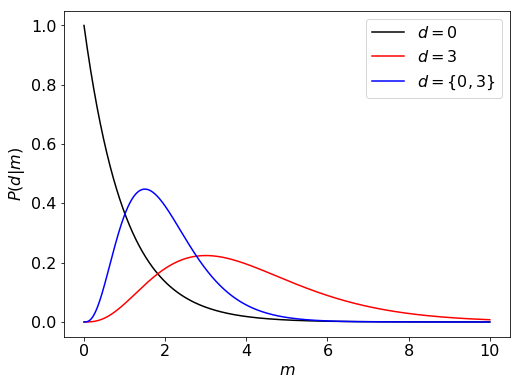

In [4]:
plt.plot(m,P1,label=r'$d=0$')
plt.plot(m,P2,label=r'$d=3$')
plt.plot(m,P12,label=r'$d=\{0,3\}$')
plt.xlabel(r'$m$')
plt.ylabel(r'$P(d|m)$')
plt.legend()

In [5]:
# case 1: d1 = 0
m_mean = np.sum(P1*m*dm)
m_std = np.sqrt(np.sum(P1*(m-m_mean)**2*dm))

print('m = {0:.3f} +/- {1:.3f}'.format(m_mean,m_std))

# upper limit
p_ul3 = 0.9985
m_ul3 = -np.log(1-p_ul3)

print('"3sigma" upper limit: m < {0:.3f}'.format(m_ul3))

m = 0.999 +/- 1.000
"3sigma" upper limit: m < 6.502


In [6]:
# case 2: d1 = 0, d2 = 3
m_mean = np.sum(P12*m*dm)
m_std = np.sqrt(np.sum(P12*(m-m_mean)**2*dm))

print('m = {0:.3f} +/- {1:.3f}'.format(m_mean,m_std))

m = 2.000 +/- 1.000


In [7]:
# how to solve the integral equation with python:

In [8]:
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.optimize import minimize

In [9]:
def integrand(x):
    return Poisson(0,x)*Poisson(3,x)/P12_norm

def func_ub(b):
    integral,err = quad(integrand, m_mean, m_mean+b)
    return integral - 0.683/2

def func_lb(b):
    integral,err = quad(integrand, m_mean+b, m_mean)
    return integral - 0.683/2

vfunc_ub = np.vectorize(func_ub)
vfunc_lb = np.vectorize(func_lb)

In [10]:
sigma_m_ub = fsolve(vfunc_ub, 0)[0]
sigma_m_lb = fsolve(vfunc_lb, 0)[0]

print('upper bound, sigma+: {0:.3f}'.format(sigma_m_ub))
print('lower bound, sigma-: {0:.3f}'.format(sigma_m_lb))

upper bound, sigma+: 1.407
lower bound, sigma-: -0.791


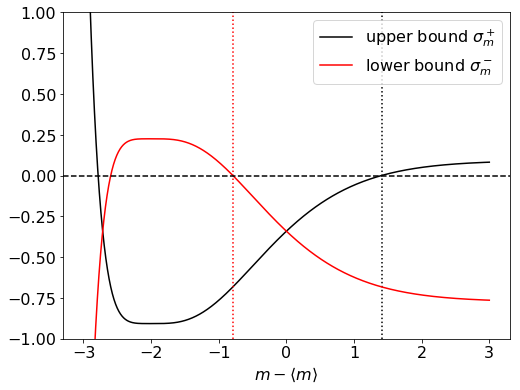

In [11]:
b_arr = np.linspace(-3.,3.,1000)

plt.plot(b_arr,vfunc_ub(b_arr),label='upper bound $\sigma_m^+$',color='black')
plt.axvline(sigma_m_ub,color='black',linestyle=':')
plt.plot(b_arr,vfunc_lb(b_arr),label='lower bound $\sigma_m^-$',color='red')
plt.axvline(sigma_m_lb,color='red',linestyle=':')
plt.axhline(0,linestyle='--')
plt.xlabel(r'$m-\langle m \rangle$')
plt.ylim(-1,1)
plt.legend()

In [12]:
# "2sigma errors"

def func_ub2(b):
    integral,err = quad(integrand, m_mean, m_mean+b)
    return integral - 0.954/2

def func_lb2(b):
    integral,err = quad(integrand, m_mean+b, m_mean)
    return integral - 0.954/2

vfunc_ub2 = np.vectorize(func_ub2)
vfunc_lb2 = np.vectorize(func_lb2)

In [13]:
sigma_m_ub2 = fsolve(vfunc_ub2, 0.5)[0]
sigma_m_lb2 = fsolve(vfunc_lb2, 0)[0]

print('upper bound, 2sigma+: {0:.3f}'.format(sigma_m_ub2))
print('lower bound, 2sigma-: {0:.3f}'.format(sigma_m_lb2))

upper bound, 2sigma+: 20.556
lower bound, 2sigma-: -1.162


/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


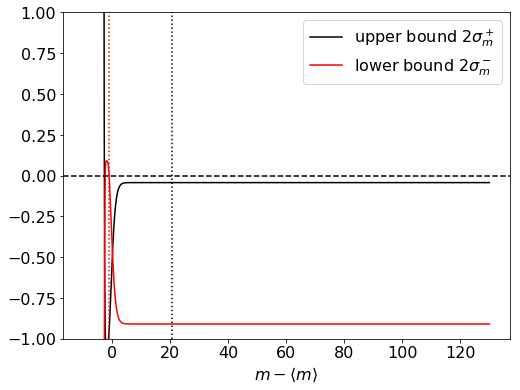

In [14]:
b_arr = np.linspace(-10.,130.,1000)

plt.plot(b_arr,vfunc_ub2(b_arr),label='upper bound $2\sigma_m^+$',color='black')
plt.axvline(sigma_m_ub2,color='black',linestyle=':')
plt.plot(b_arr,vfunc_lb2(b_arr),label='lower bound $2\sigma_m^-$',color='red')
plt.axvline(sigma_m_lb2,color='red',linestyle=':')
plt.axhline(0,linestyle='--')
plt.xlabel(r'$m-\langle m \rangle$')
plt.ylim(-1,1)
plt.legend()

<h3>There is no "$2\sigma$" upper bound for $\langle m \rangle$ because the mean is not the median!</h3>

In [15]:
# finding the median of a PDF:

def func_med(m_med):
    integral,err = quad(integrand, m_med, np.inf)
    return integral - 0.5

vfunc_med = np.vectorize(func_med)

In [16]:
m_med = fsolve(vfunc_med, 1)[0]

print('median value: {0:.3f}'.format(m_med))

median value: 1.836


In [17]:
# 1 and 2 sigma around median

def func_ub1_med(b):
    integral,err = quad(integrand, m_med, m_med+b)
    return integral - 0.683/2

def func_ub2_med(b):
    integral,err = quad(integrand, m_med, m_med+b)
    return integral - 0.954/2

def func_lb1_med(b):
    integral,err = quad(integrand, m_med+b, m_med)
    return integral - 0.683/2

def func_lb2_med(b):
    integral,err = quad(integrand, m_med+b, m_med)
    return integral - 0.954/2

vfunc_ub1_med = np.vectorize(func_ub1_med)
vfunc_lb1_med = np.vectorize(func_lb1_med)
vfunc_ub2_med = np.vectorize(func_ub2_med)
vfunc_lb2_med = np.vectorize(func_lb2_med)

In [18]:
sigma_m_med_ub1 = fsolve(vfunc_ub1_med, 0)[0]
sigma_m_med_lb1 = fsolve(vfunc_lb1_med, 0)[0]
sigma_m_med_ub2 = fsolve(vfunc_ub2_med, 0)[0]
sigma_m_med_lb2 = fsolve(vfunc_lb2_med, 0)[0]

print('upper bound, 1sigma+: {0:.3f}'.format(sigma_m_med_ub1))
print('lower bound, 1sigma-: {0:.3f}'.format(sigma_m_med_lb1))
print('upper bound, 2sigma+: {0:.3f}'.format(sigma_m_med_ub2))
print('lower bound, 2sigma-: {0:.3f}'.format(sigma_m_med_lb2))

upper bound, 1sigma+: 1.124
lower bound, 1sigma-: -0.794
upper bound, 2sigma+: 2.607
lower bound, 2sigma-: -1.305


In [19]:
# ML solution

def cstat(m,d):
    return np.sum(m-d*np.log(m))

nll = lambda *args: cstat(*args)

In [20]:
result_ML = minimize(nll,x0=1,args=([d1,d2]))
result_ML

      fun: 1.7836046756767354
 hess_inv: array([[0.75370516]])
      jac: array([-1.8030405e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.49999864])

In [21]:
m_ML = result_ML.x[0]
sigma_ML = np.sqrt(result_ML.hess_inv)[0][0]

print('Maximum likelihood solution: {0:.3f} +/- {1:.3f}'.format(m_ML,sigma_ML))

Maximum likelihood solution: 1.500 +/- 0.868


/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


(0, 10.5)

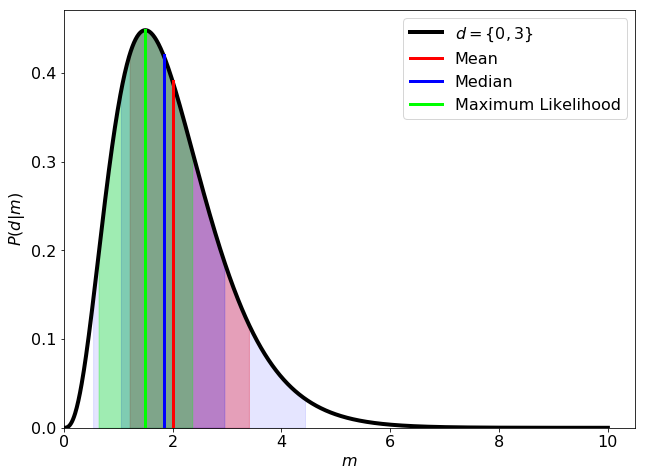

In [22]:
# plotting the distribution and intervals:
plt.figure(figsize=(10.24,7.68))

# PDF
plt.plot(m,P12,label=r'$d=\{0,3\}$',linewidth=4)

# mean value
mdx_mean = np.where(np.abs(m - m_mean) < 0.005)[0]
plt.plot(np.repeat(m_mean,2),[0,P12[mdx_mean]],color='red',label='Mean',linewidth=3)

# asymmetric 1 sigma range around mean
mdx_1s = np.where((m >= m_mean+sigma_m_lb) & (m <= m_mean+sigma_m_ub))[0]
plt.fill_between(m[mdx_1s],P12[mdx_1s],np.zeros(len(mdx_1s)),color='red',alpha=0.3)

# median value
mdx_med = np.where(np.abs(m - m_med) < 0.005)[0]
plt.plot(np.repeat(m_med,2),[0,P12[mdx_med]],color='blue',label='Median',linewidth=3)

# asymmetric 1 and 2 sigma bands around median
mdx_med_1s = np.where((m >= m_med+sigma_m_med_lb1) & (m <= m_med+sigma_m_med_ub1))[0]
plt.fill_between(m[mdx_med_1s],P12[mdx_med_1s],np.zeros(len(mdx_med_1s)),color='blue',alpha=0.2)
mdx_med_2s = np.where((m >= m_med+sigma_m_med_lb2) & (m <= m_med+sigma_m_med_ub2))[0]
plt.fill_between(m[mdx_med_2s],P12[mdx_med_2s],np.zeros(len(mdx_med_2s)),color='blue',alpha=0.1)

# maximum likelihood value
mdx_ML = np.where(np.abs(m - m_ML) < 0.005)[0]
plt.plot(np.repeat(m_ML,2),[0,P12[mdx_ML]],color='lime',label='Maximum Likelihood',linewidth=3)

# symmetric 1 sigma around ML
mdx_ML_1s = np.where((m >= m_ML-sigma_ML) & (m <= m_ML+sigma_ML))[0]
plt.fill_between(m[mdx_ML_1s],P12[mdx_ML_1s],np.zeros(len(mdx_ML_1s)),color='lime',alpha=0.3)

plt.xlabel(r'$m$')
plt.ylabel(r'$P(d|m)$')
plt.legend()
plt.ylim(0,)
plt.xlim(0,)

<h3>Note how "$\sigma$" is defined differently in all cases:<br>
    <ul>
        <li>Mean: 'first momemt'; variance: 'second moment' of the distribution</li>
        <li>Median: '50th percentile'; $1\sigma$-band: '15.85th-84.15th percentile'</li>
        <li>Maximum likelihood: 'highest point in distribution'; uncertainty: 'from quadratic approximation'</li>
    </ul>
    For the ML case, of course, one can also infer the true asymmetric uncertainties (later).<br><br>
Which value to quote? Doesn't matter as long as you write down which one it is.<br>
Though, clearly, in the case of $0$ counts, the maximum likelihood solution is outside of any(!) confidence interval because it is at the boundary of the solution. This is awkward, but the most common case in COSI.</h3>

<h1>Time series analysis in one energy bin</h1>

<h3>Now that we understand how to fit a constant rate given a series of data points, we can introduce a certain variability in it, i.e. we assume the mean rate changes with time. In general, we can express this as a function of time (for this one energy bin) as $m(t;\vec{p})$, where $\vec{p}$ are the parameters determining the time series.<br><br>
    Here we use a 'parametric' model, i.e. we assume some sort of shape as a function of time that describes our data. This shape is not necessarily meaningful for all time (there are other ways to do this then in an arbitrary way), but such a function can approximate the true time series between time $T_1$ and $T_2 > T_1$.<br><br>
    As an example, suppose we measure something for $\Delta T = T_2 - T_1 = 100\,\mathrm{s}$ with a time binning of $\delta t = 1\,\mathrm{s}$, giving us $N = 100$ measurements $d_i$ in out data set $D = \{ d_1, d_2, \dots, ..., d_{100}\}$.<br>
    Suppose further that this time series is part of a larger time series that is in general described by the function<br><br>
    $S(t;,s_0,\omega_0,\phi_0) = s_0(2 + \sin(\omega_0 t + \phi_0))$,<br><br>
    where $s_0$, $s_1$, $\omega_0$ and $\phi_0$ are some parameters, that might be related to some physical phenomenan (e.g., orbit variations of a satellite, etc.), but are in general not known. For our example, we use $s_0 = 100\,\mathrm{ph\,s^{-1}}$, $\omega_0 = 0.1/2\pi \approx 0.016$ and $\phi_0 = \pi/3$, $T_1 = 350\,\mathrm{s}$ and $T_2 = 450\,\mathrm{s}$.<br>
    Now, the part that I selected for this example doesn't look like a sine curve any more, and in fact, when we apply 'Poisson noise', we cannot be sure what we see either. So, instead of guessing the true shape of the curve, we true to approximate it emperically with a polynomial of order $n$.<br>
    How do we know what order we nned? This is the case where we can use the likelihood ratio test to determine if we get an improvement of the fit when we fit one more paramter. So, we test $4$ models:<br>
    <ol>
    <li>$m(t;a) = a$</li>
    <li>$m(t;a,b) = a + bt$</li>
    <li>$m(t;a,b,c) = a + bt + ct^2$</li>
    <li>$m(t;a,b,c,f) = a + bt + ct^2 + ft^3$</li>
    </ol>
    Below, I create a data set from the true shape and fit the same data set with each of the above models.</h3>

In [23]:
# time
t = np.arange(1000)

# true parameters
s0 = 100.
omega0 = 0.1/(2*np.pi)
phi0 = np.pi/3

# true series
S = s0*(2+np.sin(omega0*t+phi0))

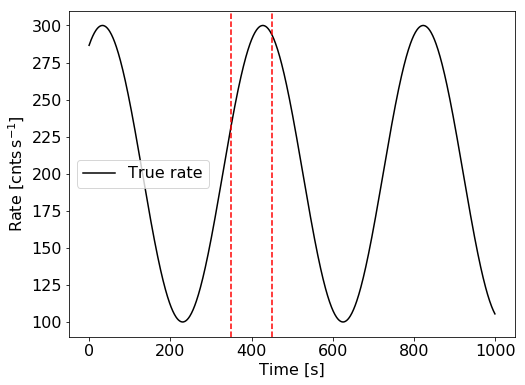

In [24]:
# plot of the true rate
plt.plot(t,S,label='True rate')
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')
plt.legend()

# our range
T1 = 350
T2 = 450
plt.axvline(T1,color='red',linestyle='--')
plt.axvline(T2,color='red',linestyle='--')

In [25]:
# find our measurements
idx = np.where((t>=T1) & (t<T2))[0]

# new arrays
tt = t[idx]
st = S[idx]

# sampling a data set ('simulate') by drawing Poisson samples:
d = np.random.poisson(st)

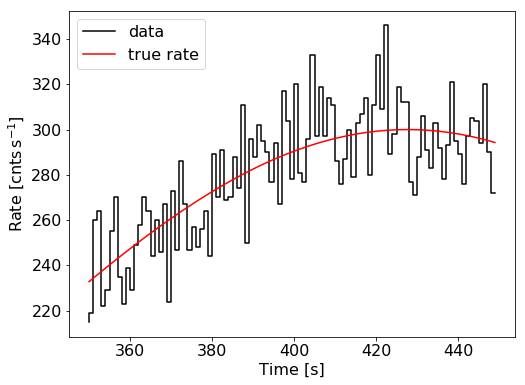

In [26]:
# and plotting
plt.step(tt,d,label='data')
plt.plot(tt,st,label='true rate')
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')
plt.legend()

<h3>Now, in principle, one could still calculate the likelihood by hand, and maximise, and integrate toward the uncertainties of all parameters, but with that number of data points (and parameters), the page will be full quite fast. But before we use a computer to do this, let me explain what we are actually trying to do mathematically:<br><br>
    In the case of model $2$, for example, we have two parameters that we are interested in, $a$ and $b$. This means, our likelihood becomes a function of $a$ and $b$, such that<br><br>
    $\mathscr{L}(D|a,b) = \prod_{i=1}^{100} \frac{(a+bt_i)^{d_i} e^{-(a+bt_i)}}{d_i!}$.<br><br>
    Since every term $\mathscr{L}_i$ is smaller than $1.0$ (every term is a probability), the product of many terms smaller than $1.0$ because very small. To avoid dealing with very small numbers, one typically goes to the log-space and calculates the log-likelihood instead (see below). But first, let me make this example easier and let's assume only $3$ data points, $D = \{d_1, d_2, d_3\}$ at $t_1$, $t_2$ and $t_3$, respectively, to which we still want to fit that straight line (model $2$, $m(t;a,b) = a + bt$ (I do this because one can in fact calculate this by hand). Therefore, our likelood only has three terms:<br><br>
    $\mathscr{L}(D|a,b) = \prod_{i=1}^{3} \frac{(a+bt_i)^{d_i} e^{-(a+bt_i)}}{d_i!}$<br><br>
    Minima are easier to find than maxima, so we calculate the logarithm of the likelihood function:<br><br>
    $\ln \mathscr{L}(D|a,b) = \ln \prod_{i=1}^3 \frac{m_i^{d_i}e^{-m_i}}{d_i!} = \sum_{i=1}^3 \left[ \ln(m_i^{d_i}) + \ln(e^{-m_i}) - \ln(d_i!) \right] = \sum_{i=i}^3 \left[ d_i\ln m_i - m_i - \ln(d_i!) \right]$.<br>
    If you consider that only $m_i$ depends on $a$ and $b$ and $d_i$ does not, we can just skip it for the maximisation as its derivative would be zero any way. Multiplying by $-2$ then arrives at<br><br>
    $\ln \mathscr{L}(D|a,b) \propto 2\sum_{i=i}^3 \left[ m_i - d_i\ln m_i\right] =: \mathscr{C}(D|a,b)$<br><br>
    This is called that Cash statistics (Cash 1979), is most commonly used in X-ray data analysis. It indeed looks much nicer, and still contains all the information that is required to solve for the maximum likelihood solution. It's not a proper probability density function any more, but one can use the approximation from above the define approximate uncertainties on the parameters (now in 2D).<br>
    The nice thing about this Cash stat is now that the partial derivatives wrt any model paramter $v$ (that we need to minimise the log-likelihood) always look the same, i.e.<br>
    $\frac{\partial}{\partial v}\mathscr{C}(D|m(v)) = \sum_i \frac{\partial m_i}{\partial v}\left(1-\frac{d_i}{m_i}\right)$.<br>
    So in our case $\frac{\partial m_i}{\partial a} = 1$ and $\frac{\partial m_i}{\partial b} = t_i$.<br>
    This can be solved by hand, but gives an insane equation for $a$ and $b$ in the case of arbitrary data $t_i$ and $d_i$. 
    So, for the sake of calculating something by hand, and producing a proper joint probability distribution for $a$ and $b$, let's assuming $t_1 = 0$, $t_2 = 1$, $t_3 = 2$, and $d_1 = 0$, $d_2 = 0$, and $d_3 = 2$. This makes the total likelihood function:<br><br>
    $\mathscr{L}(D|a,b) = \frac{1}{2}e^{-3a-3b}(a+2b)^2$ [please check and see for yourself that this is the likelihood function]<br><br>
    To make a proper probability out of that, we need to integrate over all parameters (here $a$ and $b$) to normalise $\mathscr{L}$, i.e.<br><br>
    $\mathscr{P} = \int_0^{\infty}\,da \int_0^\infty\,db\,\frac{1}{2}e^{-3a-3b}(a+2b)^2 = \frac{7}{81}$<br><br>
    (the integration limits come from the fact that we cannot measure negative counts and since at $t_1 = 0$ we measure $d_1 = 0$, we cannot go below these lower integration limits). Finally, our full joint probability distribution function reads<br><br>
    $P(D|a,b) = \frac{81}{14}e^{-3a-3b}(a+2b)^2$.<br><br>
    What a weird function, with weird numbers, but ok. How do we now get the distribution for $a$ and $b$ alone? This is done by 'marginalisation', i.e. we 'integrate out' all other parameters, except the one we are interested in, i.e.:<br><br>
    $P(D|a) = \int_0^{\infty}\,db\,P(D|a,b) = \frac{3}{14} (8 + 3 a (4 + 3 a)) e^{-3 a}$<br>
    $P(D|b) = \int_0^{\infty}\,da\,P(D|a,b) = \frac{3}{7} (1 + 6 b (1 + 3 b)) e^{-3 b}$<br><br>
    Why am I torturing you? Because one can still calculate things 'by hand', even though it's getting nasty. But with a known analytic, marginalised probability distribution, you can calculate the expectation value, and define confidence intervals. I get:<br>
    $\langle a \rangle = \frac{11}{21} \approx 0.52$ and $\langle b \rangle = \frac{17}{21} \approx 0.81$ with standard deviations<br>
    $\sigma_{a} = \frac{\sqrt{103}}{21} \approx 0.48$ and $\sigma_{b} = \frac{\sqrt{145}}{21} \approx 0.57$.<br><br>
    Now after all this math, let's program this using Python's emcee package:</h3>

In [27]:
# first, the example case
t_arr = np.array([0.,1,2])
d_arr = np.array([0,0,2.])

# d1, d2, d3

In [28]:
# set up a function like cstat above to fit for the parameters:
def straight_line_fit(theta,time,data):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant
    a = theta[0]
    
    # slope
    b = theta[1]
    
    # model
    model = a + time * b
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    if np.isfinite(stat) & (a >= 0) & (b >= 0):
        # in fact we use a prior here, but never mind, the amplitudes must be positive
        return stat
    else:
        return -np.inf

In [29]:
-straight_line_fit((0.0001,2),t_arr,d_arr)

3.2276612783852086

In [30]:
# quick check ML solution
# need to "minimise" here rather than maximise the likelihood
nll = lambda *args: -straight_line_fit(*args)

res1 = minimize(nll,    # function to minimise
                x0=[0.01,1.5],       # initial guess
                args=(t_arr,            # times
                      d_arr),           # data
                method='Nelder-Mead')   
res1

/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


 final_simplex: (array([[5.69479500e-09, 6.66828414e-01],
       [7.47012484e-08, 6.66749172e-01],
       [3.71516582e-08, 6.66857073e-01]]), array([1.42463592, 1.42463598, 1.42463599]))
           fun: 1.4246359224962646
       message: 'Optimization terminated successfully.'
          nfev: 119
           nit: 67
        status: 0
       success: True
             x: array([5.69479500e-09, 6.66828414e-01])

In [31]:
# extracting the results
a_fit = res1.x[0]
b_fit = res1.x[1]

In [32]:
a_fit,b_fit

(5.6947950006451445e-09, 0.666828414181102)

<h3>Well, that's not the values that we get from the considerations above. This is because we only calculated the maximum of that likelihood (the highest point), not the mean or median or mode ... To do that we want to integrate this 2D-PDF with Monte Carlo sampling.

<h3>Now I will use the emcee package to do the integrations from above numerically:</h3>

In [33]:
import emcee
import time

In [34]:
# here standard emcee workflow

# guess (similar to x0 from above)
init = np.array([1,20.])
# variation on the initial guess
init_var = init*1e-4

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = 2, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler, i.e. the thing that holds the information about the fit
# and performs the iterative steps; otherwise similar to calling statement from above
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                straight_line_fit,
                                args = (t_arr,
                                        d_arr))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$a$',r'$b$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
100%|██████████| 2000/2000 [00:01<00:00, 1348.27it/s]

Processing took 1.5 seconds


In [35]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  5.52e-01  4.80e-01  1.56e-03  1.21e-01  4.12e-01  1.02e+00  3.02e+00
        1:  8.10e-01  5.43e-01  4.30e-03  2.86e-01  6.89e-01  1.37e+00  2.93e+00


<h3>You see that the values, especially mean and std, are now much closer to the values we calcualted exactly above. You also see that the mean and median are again pretty different. And if you look at. the full distribution (below), you see that the maximum likelihood solution would be again at the boundaries of that PDF.<br>
    (I also picked a rather bad example here because there are <em>some</em> allowed combinations of $a$ and $b$ that still give positive values here. But for the sake of a complete example, ignore this fact.)</h3>

<h3>Ok, what is going on here:<br>
    The emcee package is doing (some version of) a Markov Chain Monte Carlo (MCMC) algorithm. The simplest one if the so-called Metropolis-Hastings algorithm, which is an accept-reject-algorithm where the target function is the likelihood. The more parameters (or data points) you provide in any model, the more complicated the likelihood function becomes. But now with all that stuff from above, the only thing you need are the marginalised probability distributions for your parameters - which you now know are 'just integragations' of the joint probability distribution. That is, the MCMC is performing this integration for you and returns the joint and marginalised distributions for you as a number of samples, which one can treat as realisations of the fitted parameters.<br>
    Because in the beginning, this algorithm starts at a random point (your initial guess), the first few samples are still trying to get to the optimum point, rather than 'exploring' the distribution. This phase is called burn-in or warm-up, and is discarded from the samples in the end. How to know how much to discard? Have a look:</h3>

<h3>Plotting the likelihood as a function of iteration:</h3>

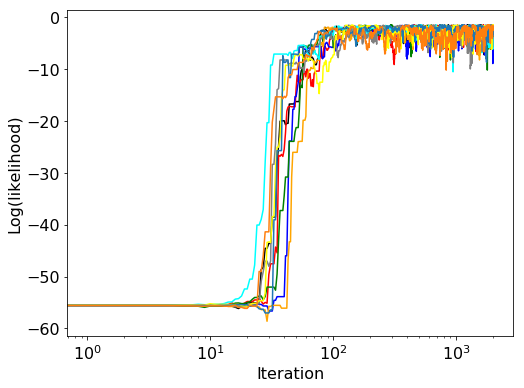

In [36]:
plt.plot(sampler.lnprobability)
plt.xlabel('Iteration')
plt.ylabel('Log(likelihood)')
plt.xscale('log')

<h3>We start this quasi-random-walk at some initial guess. This is typically a bad guess, so that the likelihood is small. We want to maximise it, and the random-walk than is actually not random but rather directed to the maximum. We start this walk with 10 'walkers' which are shown as the differently coloured lines here. Somewheere between iteration 10 and 100, the MC finds that the initial guess is bad, and walks toward a better one - maximising the likelihood. That means, beyond iteration 100, or to be safe beyond half of all iterations, the thing quasi-converged (it's not a real convergence), and we throw away the first 1000 samples here, or, as coded above, half of all.</h3>

<h3>Now the parameters:</h3>

In [37]:
"""truths = [alpha_on*np.mean(sky_spec_reb),beta_on*np.mean(bg_spec_reb)]"""

'truths = [alpha_on*np.mean(sky_spec_reb),beta_on*np.mean(bg_spec_reb)]'

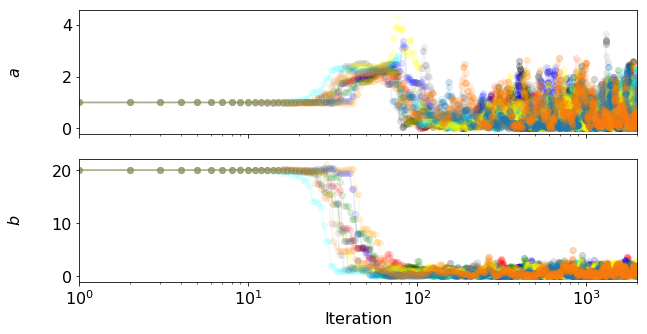

In [38]:
fig, axes = plt.subplots(2, figsize=(10, ndim*2.5), sharex=True)

for i in range(ndim):
    ax = axes[i]
    ax.plot(np.arange(n_samples),samples[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, n_samples)
    #ax.plot([1,n_samples],[truths[i],truths[i]],color='orange')
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_xscale('log')

axes[-1].set_xlabel("Iteration");

<h3>Here you see the same effect: the first few (100) iterations are just looking for the optimal point. In particular for $b$, the guess was very far off, but nicely goes down to the true value (whatever it is). So, in the end we plot the distribution of $a$, $b$, and $a$ vs. $b$ in a 'corner plot'.</h3>

In [39]:
import corner

In [40]:
samplesf.shape

(20000, 2)

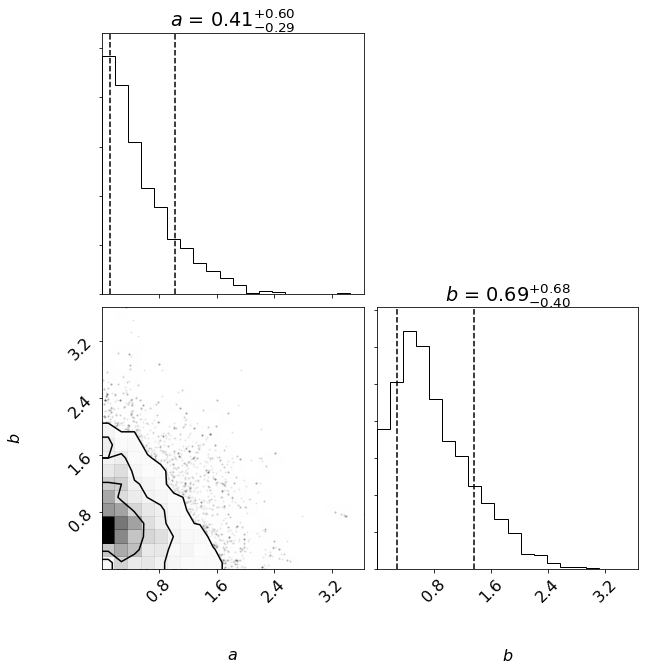

In [41]:
fig = corner.corner(samplesf[burnin*nwalkers:,:],
                    labels=labels,
                    #truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>Welcome asymmetric uncertainties.<br>
    The more samples you draw, the better (more accurate) your estimate becomes. Of course, since this is a stochastic process, the 'results' vary a little, depending on the number of iterations. If you had infinite time, you always get the same distribution by definition. Also, if you have infinite time, you can solve any problem with this approach. Though, typically, with more than 5 (or 10) parameters, the emcee algorithm breaks down and doesn't explore all the dimensions properly. But there are other algorithms that can - and when we turn to model fitting in the full data space, we might want to use Stan instead of emcee.</h3>

<h3>Now, having all this in mind, we can go on and do the same for our example data set.<br>
    The approach we used above is straight-forwardly adapted by using not the three bins, but all the bins:</h3>

In [42]:
# set up a function like cstat above to fit for the parameters:
def straight_line_fit(theta,time,data):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant
    a = theta[0]
    
    # slope
    b = theta[1]
    
    # model
    model = a + time * b
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    # here I allow a and b now to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [43]:
# here standard emcee workflow

# guess (similar to x0 from above)
init = np.array([1,20.])
# variation on the initial guess
init_var = init*1e-4

# dimensionality of the problem and defining multiple starting points for fir
ndim, nwalkers = 2, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

# taking time
start = time.time()

# setting up the sampler, i.e. the thing that holds the information about the fit
# and performs the iterative steps; otherwise similar to calling statement from above
sampler = emcee.EnsembleSampler(nwalkers,
                                ndim,
                                straight_line_fit,
                                args = (tt,
                                        d))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler.run_mcmc(pos, iters, progress=True)

# taking time again
end = time.time()

# extract samples
samples = sampler.get_chain()
samplesf = sampler.flatchain

# for processing later
n_samples = iters
n_walkers = nwalkers
# variable names
labels = [r'$a$',r'$b$']

# which things to throw away (cf. later)
burnin = int(0.5*n_samples)

ttime = end - start
print("Processing took {0:.1f} seconds".format(ttime))

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
100%|██████████| 2000/2000 [00:01<00:00, 1263.29it/s]

Processing took 1.6 seconds


In [44]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples[burnin:,:,i])
    std_val    = np.std(samples[burnin:,:,i])
    median_val = np.median(samples[burnin:,:,i])
    ub1_val    = np.percentile(samples[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  4.45e+00  2.36e+01 -6.17e+01 -1.94e+01  4.79e+00  2.78e+01  7.11e+01
        1:  6.92e-01  5.91e-02  5.29e-01  6.34e-01  6.91e-01  7.52e-01  8.62e-01


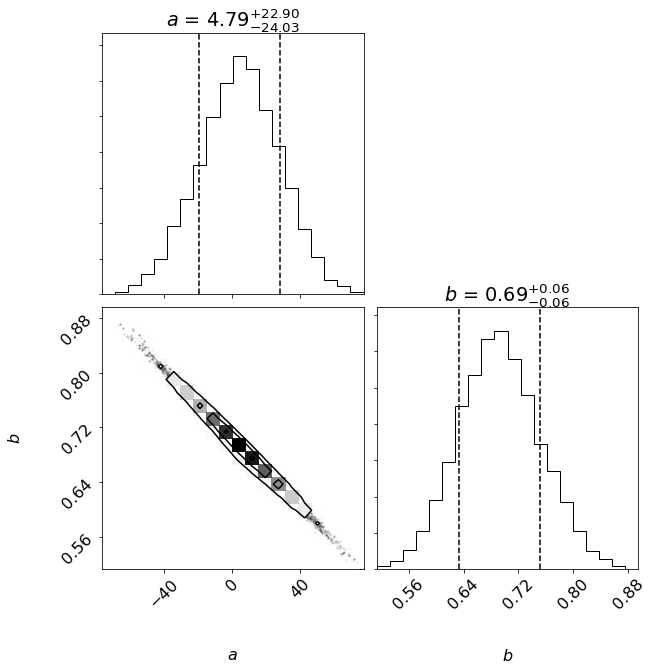

In [45]:
fig = corner.corner(samplesf[burnin*nwalkers:,:],
                    labels=labels,
                    #truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>Let's plot this:<br>
    Each of the (accepted pair of) samples are one realisation, one draw, of the resulting distribution. That means each sample gives one model that 'fits' the data, whatever that means. Thus, we can calculate the model for many many many samples and get a distribution of models (rather than only its parameters). This we can compare to the data, and, for example, check the residuals (which should also be asymmetric!):</h3>

In [46]:
samples.shape

(2000, 10, 2)

In [47]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models = np.zeros((len(tt),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models[:,i-nwalkers*last_x_samples] = samplesf[i,0] + samplesf[i,1]*tt

In [48]:
y_models.shape

(100, 1000)

Text(0, 0.5, 'Rate [$\\mathrm{cnts\\,s^{-1}}$]')

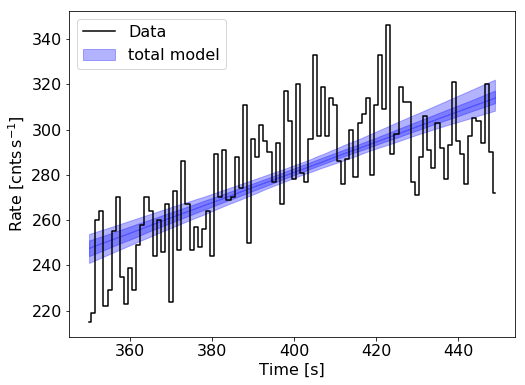

In [49]:
# and plotting the thing:

# data
plt.step(tt,d,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(tt,
                     np.percentile(y_models,50-level/2,axis=1),
                     np.percentile(y_models,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='total model')

# and a useful legend
plt.legend(['Data','total model'])
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')

<h3>Is that a good fit?<br>
    That's actually an ill-defined question. Though, we can have a look at the residuals and check if we see some <em>residual</em> structure. Another possibility would be to draw many Poisson samples from our fitted model (the blue band), and see how often (or where) the model doesn't predict the data.<br>
    You might also think about $\chi^2$, but since we didn't use $\chi^2$ because our data are Poisson-distributed, this value has barely any meaning.<br>
    But what about the likelihood? The likelihood alone has (almost) no meaning. But it becomes meaningful when compared to other likelihoods of the same model family. So if we fit (see below) all the other models, we can check how our likelihood behaves.<br>
    First residuals:</h3>

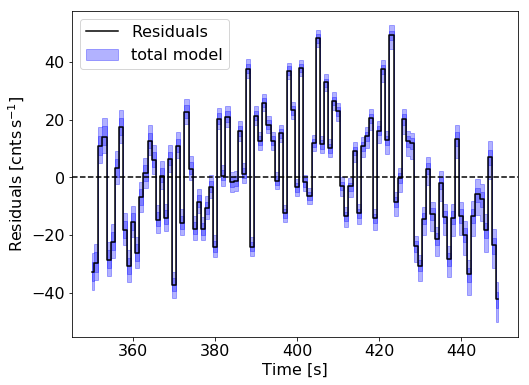

In [50]:
# and plotting the thing:

# data
plt.step(tt,d-np.percentile(y_models,50,axis=1),where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(tt,
                     d-np.percentile(y_models,50-level/2,axis=1),
                     d-np.percentile(y_models,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='total model',step='mid')

# and a useful legend
plt.legend(['Residuals','total model'])
plt.xlabel('Time [s]')
plt.ylabel(r'Residuals [$\mathrm{cnts\,s^{-1}}$]')
plt.axhline(0,linestyle='--')

<h3>There certainly is some residual structure; the curve is still bending. Let's look at the residuals per unit deviation:</h3>

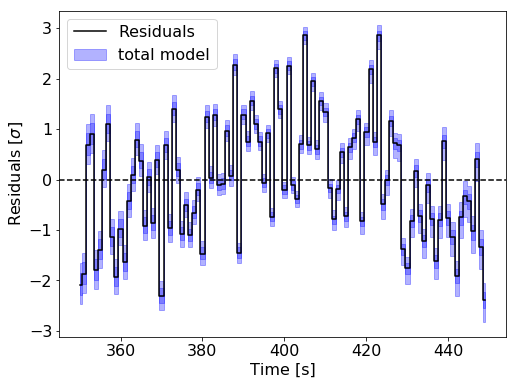

In [51]:
# and plotting the thing:

median_model = np.percentile(y_models,50,axis=1)
median_model_std = np.sqrt(median_model)

# data
plt.step(tt,(d-np.percentile(y_models,50,axis=1))/median_model_std,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total model
    plt.fill_between(tt,
                     (d-np.percentile(y_models,50-level/2,axis=1))/median_model_std,
                     (d-np.percentile(y_models,50+level/2,axis=1))/median_model_std,
                     color='blue',alpha=0.3,label='total model',step='mid')

# and a useful legend
plt.legend(['Residuals','total model'])
plt.xlabel('Time [s]')
plt.ylabel(r'Residuals [$\sigma$]')
plt.axhline(0,linestyle='--')

<h3>This is the same as looking at $delchi$ in XSPEC. You see that the residuals are actually not that large, but the peculiar structure is directly visible. Also the model uncertainties do not capture the remaining variance (i.e. the blue bars don't go to $0$ or close to $0$).<br>
    Let's finally fit models $1$ to $4$.</h3>

In [52]:
# set up a function like cstat above to fit for the parameters:
def constant_fit(theta,time,data):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant
    a = theta[0]
    
    # model
    model = a + time * 0.
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    # here I allow a and b now to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [53]:
# set up a function like cstat above to fit for the parameters:
def quadratic_fit(theta,time,data):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant
    a = theta[0]
    
    # slope
    b = theta[1]
    
    # parabola
    c = theta[2]
    
    # model
    model = a + time * b + time**2 * c
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    # here I allow a and b now to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [54]:
# set up a function like cstat above to fit for the parameters:
def cubic_fit(theta,time,data):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # constant
    a = theta[0]
    
    # slope
    b = theta[1]
    
    # parabola
    c = theta[2]
    
    # cubic
    f = theta[3]
    
    # model
    model = a + time * b + time**2 * c + time**3 * f
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    # here I allow a and b now to vary as needed by the data without any restrictions
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [55]:
# constant

init = np.array([200.])
init_var = init*1e-4

ndim, nwalkers = 1, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler1 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 constant_fit,
                                 args = (tt,
                                         d))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler1.run_mcmc(pos, iters, progress=True)

samples1 = sampler1.get_chain()
samples1f = sampler1.flatchain

burnin = int(0.5*n_samples)

100%|██████████| 2000/2000 [00:01<00:00, 1396.47it/s]


In [56]:
# straight line

init = np.array([20,200.])
init_var = init*1e-4

ndim, nwalkers = 2, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler2 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 straight_line_fit,
                                 args = (tt,
                                         d))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler2.run_mcmc(pos, iters, progress=True)

samples2 = sampler2.get_chain()
samples2f = sampler2.flatchain

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
100%|██████████| 2000/2000 [00:01<00:00, 1317.09it/s]


In [57]:
# parabola

init = np.array([20,200.,1])
init_var = init*1e-4

ndim, nwalkers = 3, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler3 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 quadratic_fit,
                                 args = (tt,
                                         d))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler3.run_mcmc(pos, iters, progress=True)

samples3 = sampler3.get_chain()
samples3f = sampler3.flatchain

100%|██████████| 2000/2000 [00:01<00:00, 1234.48it/s]


In [58]:
# cubic

init = np.array([20,200.,1,0.1])
init_var = init*1e-4

ndim, nwalkers = 4, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler4 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 cubic_fit,
                                 args = (tt,
                                         d))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler4.run_mcmc(pos, iters, progress=True)

samples4 = sampler4.get_chain()
samples4f = sampler4.flatchain

100%|██████████| 2000/2000 [00:02<00:00, 942.16it/s] 


<h3>The only number we want is actually the maximum likelihood in each run, so that we can compare the fits, but let's plot the different models all at once to give is a visual impression what looks promising:</h3>

In [59]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models1 = np.zeros((len(tt),n_plot_samples))
y_models2 = np.zeros((len(tt),n_plot_samples))
y_models3 = np.zeros((len(tt),n_plot_samples))
y_models4 = np.zeros((len(tt),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models1[:,i-nwalkers*last_x_samples] = np.repeat(samples1f[i,0],len(tt))
    y_models2[:,i-nwalkers*last_x_samples] = samples2f[i,0] + samples2f[i,1]*tt
    y_models3[:,i-nwalkers*last_x_samples] = samples3f[i,0] + samples3f[i,1]*tt + samples3f[i,2]*tt**2
    y_models4[:,i-nwalkers*last_x_samples] = samples4f[i,0] + samples4f[i,1]*tt + samples4f[i,2]*tt**2 + samples4f[i,3]*tt**3

<h3>It would have been useful to define the functions we fit instead of writing them down all the time ...</h3>

Text(0, 0.5, 'Rate [$\\mathrm{cnts\\,s^{-1}}$]')

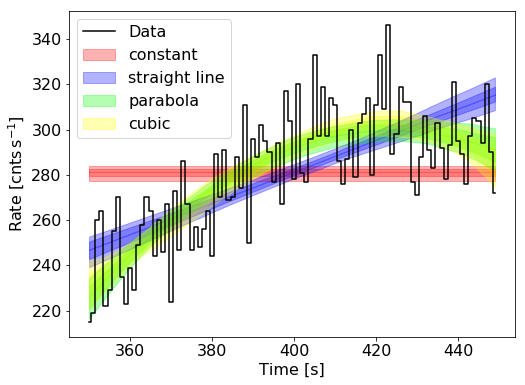

In [60]:
# and plotting the thing:

# data
plt.step(tt,d,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total models
    plt.fill_between(tt,
                     np.percentile(y_models1,50-level/2,axis=1),
                     np.percentile(y_models1,50+level/2,axis=1),
                     color='red',alpha=0.3,label='constant')
    
    plt.fill_between(tt,
                     np.percentile(y_models2,50-level/2,axis=1),
                     np.percentile(y_models2,50+level/2,axis=1),
                     color='blue',alpha=0.3,label='straight line')

    plt.fill_between(tt,
                     np.percentile(y_models3,50-level/2,axis=1),
                     np.percentile(y_models3,50+level/2,axis=1),
                     color='lime',alpha=0.3,label='parabola')
    
    plt.fill_between(tt,
                     np.percentile(y_models4,50-level/2,axis=1),
                     np.percentile(y_models4,50+level/2,axis=1),
                     color='yellow',alpha=0.3,label='cubic')
# and a useful legend
plt.legend(['Data','constant','straight line','parabola','cubic'])
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')

<h3>constant: bad; straight line: bad, parabola: looks promising; cubic: no difference to parabola<br>
    Now our likelihoods:</h3>

In [61]:
lnliks = np.array([np.max(sampler1.lnprobability),
                   np.max(sampler2.lnprobability),
                   np.max(sampler3.lnprobability),
                   np.max(sampler4.lnprobability)])

n_par = np.arange(1,5)

Text(0, 0.5, '$\\ln\\mathscr{L}$')

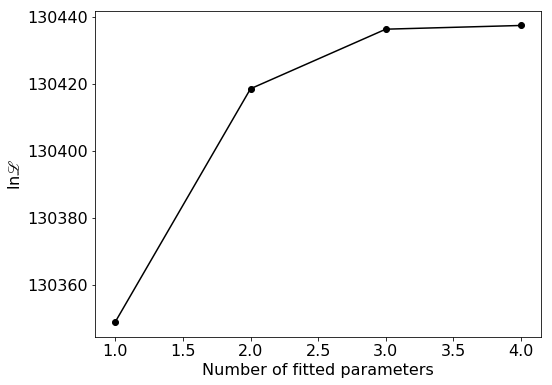

In [62]:
plt.plot(n_par,lnliks,'o-')
plt.xlabel('Number of fitted parameters')
plt.ylabel(r'$\ln\mathscr{L}$')

<h3>The higher the likelihood the better the fit. This statement is always true: the more parameters you use, the better the likelihood becomes. However, at some point you start <em>over-fitting</em>, i.e. you add one degree of freedom (one parameter) but change the likelihood only by a small amount (say, $0.3$ as is the case here).<br>
    Now we can use the parabola, and go on with what we actually wanted to do: estimating the number of counts in an interval with this function.
    (For completeness, and because I used it in my paper, we can use the AIC (Akaika Information Criterion) to confidently pick the most adequate model.<br>
    The AIC is conveniently defined as $\mathrm{AIC} = -2 (\ln\mathscr{L} - n_{par})$, and we plot $\Delta\mathrm{AIC}$-values to actually see something hapenning:</h3>

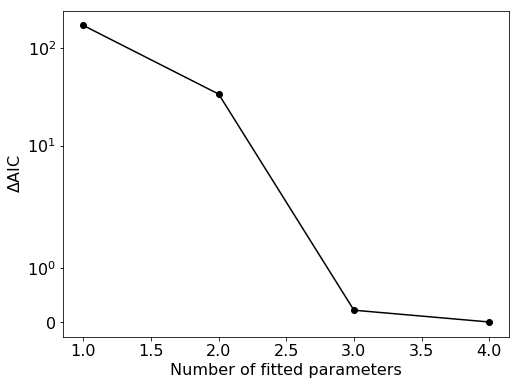

In [63]:
plt.plot(n_par,-2*(lnliks-n_par) - np.min(-2*(lnliks-n_par)),'o-')
plt.xlabel('Number of fitted parameters')
plt.ylabel(r'$\Delta\mathrm{AIC}$')
plt.yscale('symlog')

Text(0, 0.5, 'Rate [$\\mathrm{cnts\\,s^{-1}}$]')

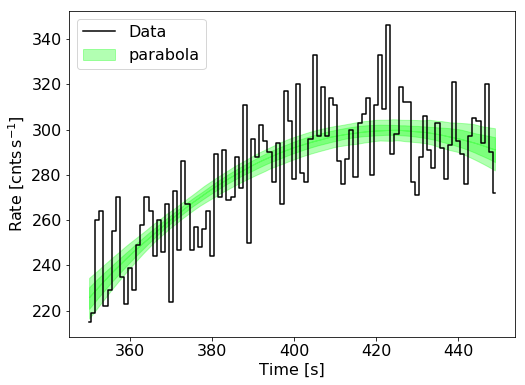

In [64]:
# data
plt.step(tt,d,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total models
    plt.fill_between(tt,
                     np.percentile(y_models3,50-level/2,axis=1),
                     np.percentile(y_models3,50+level/2,axis=1),
                     color='lime',alpha=0.3,label='parabola')
    
# and a useful legend
plt.legend(['Data','parabola'])
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')

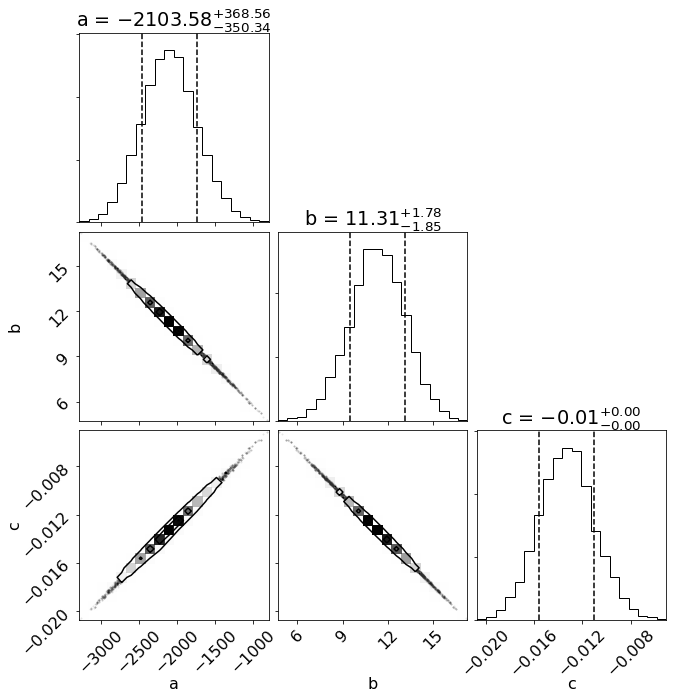

In [65]:
ndim = 3

fig = corner.corner(samples3f[burnin*nwalkers:,:],
                    labels=['a','b','c'],
                    #truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

In [66]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(3):
    mean_val   = np.mean(samples3[burnin:,:,i])
    std_val    = np.std(samples3[burnin:,:,i])
    median_val = np.median(samples3[burnin:,:,i])
    ub1_val    = np.percentile(samples3[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples3[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples3[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples3[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0: -2.10e+03  3.63e+02 -3.08e+03 -2.46e+03 -2.10e+03 -1.73e+03 -9.71e+02
        1:  1.13e+01  1.83e+00  5.55e+00  9.46e+00  1.13e+01  1.31e+01  1.63e+01
        2: -1.33e-02  2.29e-03 -1.96e-02 -1.56e-02 -1.33e-02 -1.10e-02 -6.01e-03


<h3>You see that the marginalised distributions (diagonals) are very much Gaussian. That means we can, when estimating the area under the curve between two points $t_1$ and $t_2$ by integrating the quadratic function, approximate the uncertainty of that area by Gaussian propagation of uncertainties. I will call that area $B$ and its uncertainty $\sigma_B$ (for obvious reasons about the background later). We have:<br><br>
    $B = \int_{t_1}^{t_2}\,dt\,(a+bt+ct^2) = a(t_2-t_1) + \frac{1}{2}b(t_2^2-t_1^2) + \frac{1}{3}c(t_2^3 - t_1^3)$ and with propagation of uncertainties<br>
    $\sigma_B^2 = \left( \frac{\partial B}{\partial a} \sigma_a \right)^2 + \left( \frac{\partial B}{\partial b} \sigma_b \right)^2 + \left( \frac{\partial B}{\partial c} \sigma_c \right)^2 + 2 \frac{\partial B}{\partial a}\frac{\partial B}{\partial b} \sigma_{ab} + 2 \frac{\partial B}{\partial a}\frac{\partial B}{\partial c} \sigma_{ac} + 2 \frac{\partial B}{\partial b}\frac{\partial B}{\partial c} \sigma_{bc}$.<br><br>
    The terms of $\sigma^2$ with one index are the variances of the fitted parameters (the widths of the marginalised dsitributions), the terms like $\sigma_{ab}$ are the <em>co</em>variances, here between $a$ and $b$, i.e. how does $a$ change with $b$, and so on.<br>
    In the corner plot, you see that the joint distribution between $a$ and $b$, for example, is very narrow and tilted 45 degrees with a negative slope. This means they are completely anti-correlated (in the case of a straight line, this is easily understandable: to get a 'good' fit, some parameters $a$ and $b$ provide that, but if you vary $a$, i.e. the y-intersect slight upwards, you have to decrease $b$ to still match your straight line with the data; likewise, if you slight shift $a$ to smaller values, the slope $b$ must be larger to still fit the data; in summary this means $a$ and $b$ are anti-correlated (correlation values go from -1 to +1, where 0 is not correlated), and have a certain covariance (i.e. the value including the magnitude of the values, and can be anything)). Or, $a$ and $c$ are correlated, etc. These covariances have to be taken into account to properly propagate the uncertainties.<br>
    We cen determine the sample covariance from the $N=2000$ iterations of our MCMC algorithm, as<br><br>
    $\sigma_{ij} = \frac{1}{N}\sum_{k=1}^N (i - \langle i \rangle)(j - \langle j \rangle)$, where $\langle i \rangle$ is the sample mean of the distribution of parameter $i$ (cf. also definition of variance and std with the full probability distribution function above).<br>
    Now, let's do this for our fit above, and estimate the background count rate $B$ between $t_1 = 400$ and $t_2 = 410$:</h3>

In [67]:
means = np.mean(samples3[burnin:,:,:],axis=(0,1))
print('mean values of fitted parameters: ',means)
stds = np.std(samples3[burnin:,:,:],axis=(0,1))
print('uncertainties of fitted parameters: ',stds)
covab = np.mean((samples3[burnin:,:,0]-means[0])*(samples3[burnin:,:,1]-means[1]),axis=(0,1))
covac = np.mean((samples3[burnin:,:,0]-means[0])*(samples3[burnin:,:,2]-means[2]),axis=(0,1))
covbc = np.mean((samples3[burnin:,:,1]-means[1])*(samples3[burnin:,:,2]-means[2]),axis=(0,1))
covs = np.array([covab,covac,covbc])
print('covariances of fitted parameters: ',covs)

mean values of fitted parameters:  [-2.09549700e+03  1.12806582e+01 -1.32760555e-02]
uncertainties of fitted parameters:  [3.63131361e+02 1.82603297e+00 2.28663671e-03]
covariances of fitted parameters:  [-6.62753142e+02  8.28698156e-01 -4.17342034e-03]


In [68]:
t1 = 400.
t2 = 410.
dt = t2-t1
area = means[0]*(t2-t1) + 1/2*means[1]*(t2**2-t1**2) + 1/3*means[2]*(t2**3-t1**3)
print('mean of expected count between 400 and 410 s: ',area)

mean of expected count between 400 and 410 s:  2954.5395463624445


<h3>The partial derivates of $B(a,b,c)$ are:<br>
    $\frac{\partial B}{\partial a} = (t_2-t_1)$<br>
    $\frac{\partial B}{\partial b} = \frac{1}{2}(t_2^2-t_1^2)$<br>
    $\frac{\partial B}{\partial c} = \frac{1}{3}(t_2^3-t_1^3)$</h3>

In [69]:
dBda = t2-t1
dBdb = 1/2*(t2**2-t1**2)
dBdc = 1/3*(t2**3-t1**3)

variance_area = (dBda*stds[0])**2 + (dBdb*stds[1])**2 + (dBdc*stds[2])**2 + \
2*dBda*dBdb*covs[0] + 2*dBda*dBdc*covs[1] + 2*dBdb*dBdc*covs[2] 

sigma_area = np.sqrt(variance_area)
print('uncertainty of expected count between 400 and 410 s: ',sigma_area)

uncertainty of expected count between 400 and 410 s:  23.66640891144788


<h3>So, one final answer would be: the expected count rate between $t_1 = 400\,\mathrm{s}$ and $t_2 = 410\,\mathrm{s}$ is $B \pm \sigma_B = 2935 \pm 25$ counts in 10 seconds.<br><br>
    All this propagation stuff is quite cumbersome, and in fact there is a way to to it all at once, i.e. fitting for the area, rather than doing all these approximations and propagations.<br>
    Remember that the area in the time interval is $B(a,b,c) = a(t_2-t_1) + \frac{1}{2}b(t_2^2-t_1^2) + \frac{1}{3}c(t_2^3 - t_1^3)$. Also remember that the function we fit is $m(a,b,c) = a + bt + ct^2$. Both expressions have the same parameters, so we can just substitute, for example, $a(B,b,c)$ in to $m(a,b,c)$ to get $m(a(B,b,c,),b,c,)$ which is then just $m(B,b,c)$, so we fit $B$ instead of $a$, and get all the propagate uncertainties for free without an extra step. Just requires a little bit of algebra:<br><br>
    $B = a(t_2-t_1) + \frac{1}{2}b(t_2^2-t_1^2) + \frac{1}{3}c(t_2^3 - t_1^3)$<br>
    $\leftrightarrow a = \frac{B}{t_2-t_1} + \frac{1}{2}b\frac{t_2^2-t_1^2}{t_2-t_1} + \frac{1}{3}c\frac{t_2^3 - t_1^3}{t_2-t_1}$<br>
    $\leftrightarrow a = \frac{B}{t_2-t_1} + \frac{1}{2}b(t_2+t_1) + \frac{1}{3}c(t_2^2+t_1t_2+t_1^2)$<br>
    and inserting the $m(a,b,c)$ gives
    $m = \frac{B}{t_2-t_1} + \frac{1}{2}b(t_2+t_1) + \frac{1}{3}c(t_2^2+t_1t_2+t_1^2) + bt + ct^2$<br>
    $\leftrightarrow m = \frac{B}{t_2-t_1} + b(t-\frac{1}{2}(t_2+t_1)) + c(t^2-\frac{1}{3}(t_2^2+t_1t_2+t_1^2))$<br><br>
    This can be programmed just as the other functions above, and takes the two values $t_1$ and $t_2$ as additional (fixed) input.</h3>

In [70]:
def parabola_with_area(t,p):
    
    # normal parabola model
    #a = p[0]
    b = p[1]
    c = p[2]
    #parabola = a + b*t + c*t**2
    
    # want to know area between t1 and t2
    t1 = p[3]
    t2 = p[4]
    dt1 = t2-t1
    dt2 = t2+t1
    dt3 = t2**2 + t1*t2 + t1**2

    # area
    # area = a*dt1 + 0.5*b*(t2**2-t1**2) + 0.3333*c*(t2**3-t1**3)
    # solve for a and insert back to parabola
    
    B = p[0]
    
    # total function
    val = B/dt1 + b*(t - 1/2*dt2) + c*(t**2 - 1/3*dt3)
    
    #print(val)
    
    return val

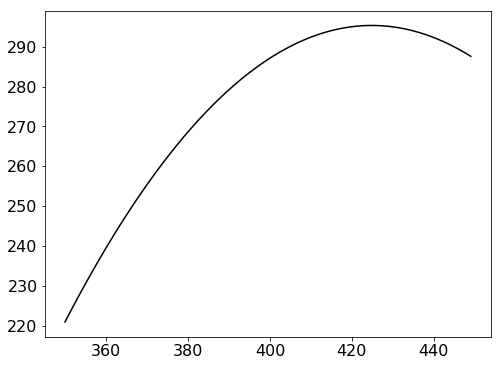

In [71]:
plt.plot(tt,parabola_with_area(tt,(2900,means[1],means[2],400,410)))

In [72]:
# set up a function like cstat above to fit for the parameters:
def parabola_with_area_fit(theta,time,data,t1,t2):
    # in the definition of these functions, the fit parameter(s) have to be first
    
    # model
    model = parabola_with_area(time,[theta[0],theta[1],theta[2],t1,t2])
    
    # cstat as above just with an exception that things must be positive
    stat = -np.sum(model - data*np.log(model))
    
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [73]:
# parabola

init = np.array([2000,1.,0.0001])
init_var = init*1e-4

ndim, nwalkers = 3, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler5 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 parabola_with_area_fit,
                                 args = (tt,
                                         d,
                                         400,
                                         410))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler5.run_mcmc(pos, iters, progress=True)

samples5 = sampler5.get_chain()
samples5f = sampler5.flatchain

100%|██████████| 2000/2000 [00:01<00:00, 1031.78it/s]


In [74]:
# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples5[burnin:,:,i])
    std_val    = np.std(samples5[burnin:,:,i])
    median_val = np.median(samples5[burnin:,:,i])
    ub1_val    = np.percentile(samples5[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples5[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples5[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples5[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.95e+03  2.56e+01  2.87e+03  2.93e+03  2.95e+03  2.98e+03  3.03e+03
        1:  1.12e+01  1.76e+00  6.03e+00  9.47e+00  1.12e+01  1.30e+01  1.65e+01
        2: -1.32e-02  2.21e-03 -1.99e-02 -1.55e-02 -1.32e-02 -1.10e-02 -6.73e-03


In [75]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models5 = np.zeros((len(tt),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models5[:,i-nwalkers*last_x_samples] = parabola_with_area(tt,[samples5f[i,0],samples5f[i,1],samples5f[i,2],400,410])

Text(0, 0.5, 'Rate [$\\mathrm{cnts\\,s^{-1}}$]')

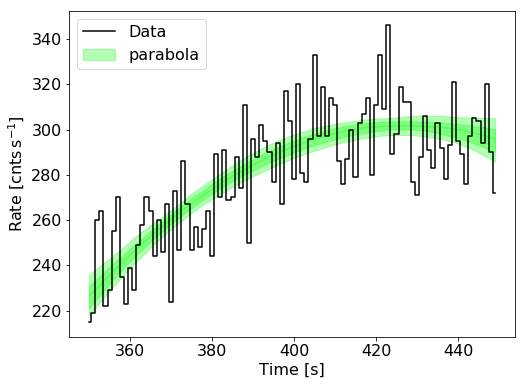

In [76]:
# data
plt.step(tt,d,where='mid')

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total models
    plt.fill_between(tt,
                     np.percentile(y_models5,50-level/2,axis=1),
                     np.percentile(y_models5,50+level/2,axis=1),
                     color='lime',alpha=0.3,label='parabola')
    
# and a useful legend
plt.legend(['Data','parabola'])
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')

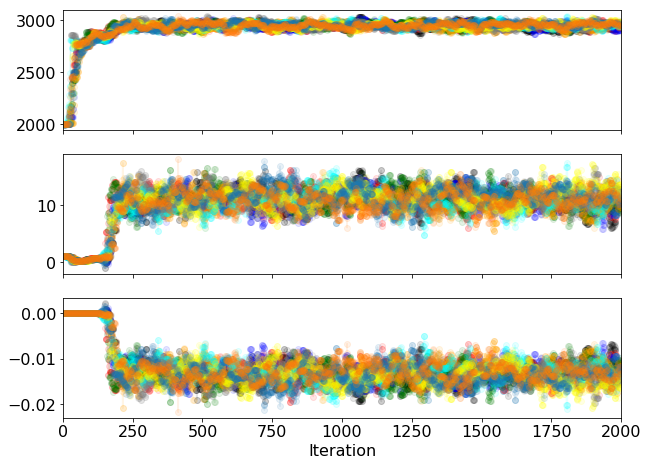

In [77]:

fig, axes = plt.subplots(ndim, figsize=(10, ndim*2.5), sharex=True)

for i in range(ndim):
    ax = axes[i]
    ax.plot(np.arange(n_samples),samples5[:, :, i], alpha=0.1,marker='o')
    ax.set_xlim(1, n_samples)
    #ax.plot([1,n_samples],[truths[i],truths[i]],color='orange')
    #ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    #ax.set_xscale('log')

axes[-1].set_xlabel("Iteration");

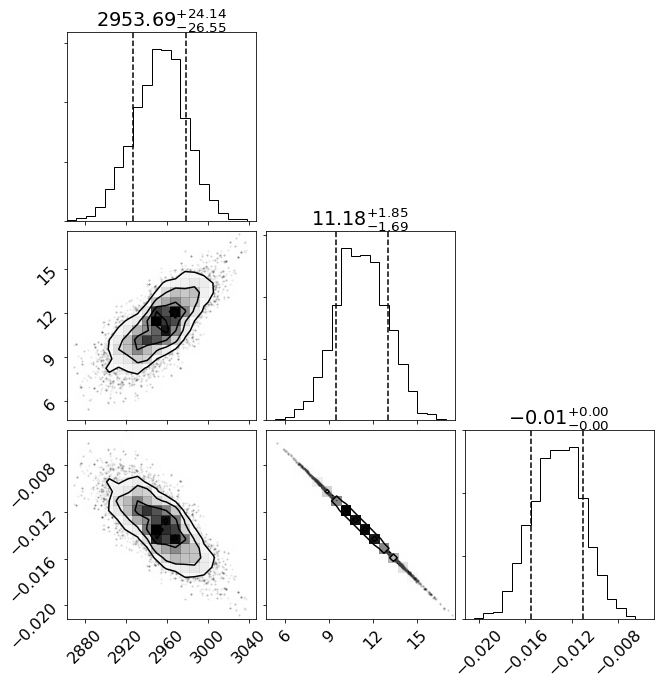

In [78]:
fig = corner.corner(samples5f[burnin*nwalkers:,:],
                    #labels=labels,
                    #truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>As you can see, we get the same answer for $B$ and its uncertainty, but all in one step. You also see that here, $B$ and the other parameters are not as strongly correlated as $a$ was.<br><br>
    What actually is the true answer?<br>
    Well, for this, we have to go back to the beginning and integrate over that sine function:</h3>

In [79]:
# we choose the 10 time bins and sum over our true rate:
t12dx = np.where((t>=t1) & (t<t2))[0]
np.sum(S[t12dx])

2931.726274722502

<h3>Great, nailed it. Even though, we did not fit the true shape, but that doesn't matter as long as our approximation is good enough.<br><br>
    Now, we did all that because we want to know if in any time interval where we think there is a GRB (or similar), how much comes from that GRB, given that we know what the background count rate is in this time interval from neighbouring times.<br>
    For this, I have to invent a response for one time bin and one energy bin (later this is the part where everything is connected). So, in that time interval, there is something in addition to the background, and because we ignore everything else, this additional contribution is a constant $g$, such that $G(t) = g\,\,\forall t_1 < t < t_2$ and $0$ else.<br><br>
    So, we build a new data set and add a contribution of, say, $g = 50$ for all the ten time bins in our time bin of interest:</h3>

In [80]:
# find our measurements
idx = np.where((t>=T1) & (t<T2))[0]

# new arrays 
tt = t[idx]

# background
st = S[idx]

# GRB
gdx = np.where((tt>=t1) & (tt<t2))[0]

g = 50.
gt = np.zeros(len(tt))
gt[gdx] = g

# sampling a data set ('simulate') by drawing Poisson samples:
d = np.random.poisson(st + gt)

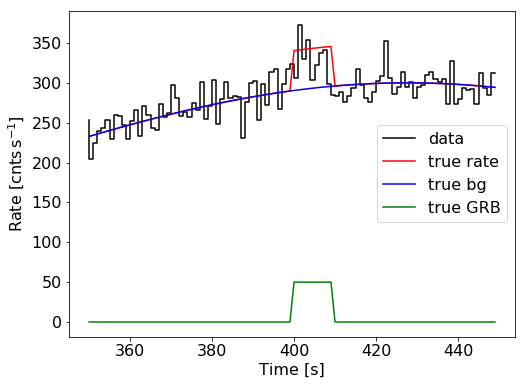

In [81]:
# and plotting
plt.step(tt,d,label='data')
plt.plot(tt,st+gt,label='true rate')
plt.plot(tt,st,label='true bg')
plt.plot(tt,gt,label='true GRB')
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')
plt.legend()

<h3>Does it look like a typical GRB? Maybe, maybe not, but that doesn't matter right now. What does matter is that we can now go through our machinery and determine the expected counts in the time interval $[t_1,t_2]$ by masking out this interval, plus some margin as we would typically do. Say, we give it $10$ seconds extra on both sides.<br>
    Thus our background estimation data set is:</h3>

In [82]:
bdx = np.where((tt < t1-10) | (tt >= t2+10))[0]

# for plotting
bdx1 = np.where(tt < t1-10)[0]
bdx2 = np.where(tt > t2+10)[0]

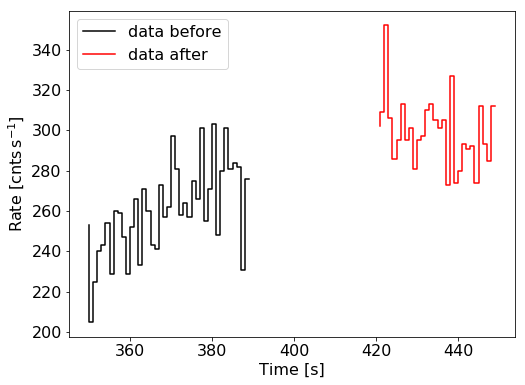

In [83]:
plt.step(tt[bdx1],d[bdx1],label='data before')
plt.step(tt[bdx2],d[bdx2],label='data after')
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')
plt.legend()

<h3>... and we fit with our function from above:</h3>

In [84]:
# parabola

init = np.array([2000,1.,0.0001])
init_var = init*1e-4

ndim, nwalkers = 3, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler6 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 parabola_with_area_fit,
                                 args = (tt[bdx],
                                         d[bdx],
                                         t1,
                                         t2))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler6.run_mcmc(pos, iters, progress=True)

samples6 = sampler6.get_chain()
samples6f = sampler6.flatchain

# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples6[burnin:,:,i])
    std_val    = np.std(samples6[burnin:,:,i])
    median_val = np.median(samples6[burnin:,:,i])
    ub1_val    = np.percentile(samples6[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples6[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples6[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples6[burnin:,:,i],50-99.73/2)
    spec_params[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))

100%|██████████| 2000/2000 [00:01<00:00, 1212.70it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.94e+03  3.79e+01  2.83e+03  2.91e+03  2.94e+03  2.98e+03  3.05e+03
        1:  9.99e+00  2.29e+00  3.61e+00  7.68e+00  9.99e+00  1.23e+01  1.66e+01
        2: -1.17e-02  2.86e-03 -1.99e-02 -1.47e-02 -1.17e-02 -8.87e-03 -3.73e-03


In [85]:
spec_params[0,0],spec_params[0,1]

(2944.627298961793, 37.91093764233747)

<h3>Here our background estimate is $B = 2954.1 \pm 39.3$. Remember: total counts in $10$ seconds, which we combine into one bin.</h3>

In [86]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 100 energy bins
y_models6 = np.zeros((len(tt),n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models6[:,i-nwalkers*last_x_samples] = parabola_with_area(tt,[samples6f[i,0],samples6f[i,1],samples6f[i,2],t1,t2])

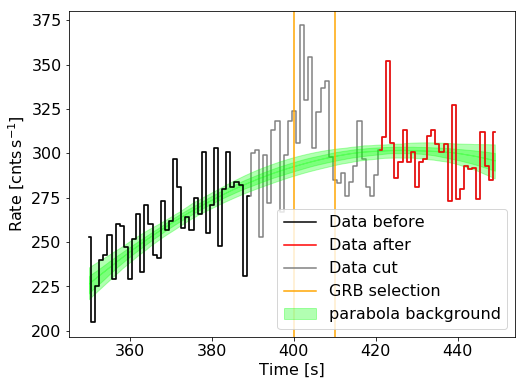

In [87]:
# data
plt.step(tt[bdx1],d[bdx1],where='mid')
plt.step(tt[bdx2],d[bdx2],where='mid')

plt.step(tt,d,where='mid',color='gray',zorder=-100)

# and looping over some self-defined confidence levels, where
# 0 is the median (one central line), 68.3 is 1sigma, 95.4 is 2sigma
for level in [0,68.3,95.4]:
    # total models
    plt.fill_between(tt,
                     np.percentile(y_models5,50-level/2,axis=1),
                     np.percentile(y_models5,50+level/2,axis=1),
                     color='lime',alpha=0.3,label='parabola')
    
plt.axvline(t2,color='orange',label='GRB selection')
    
# and a useful legend
plt.legend(['Data before','Data after','Data cut','GRB selection','parabola background'])
plt.xlabel('Time [s]')
plt.ylabel(r'Rate [$\mathrm{cnts\,s^{-1}}$]')
plt.axvline(t1,color='orange')

<h3>Finally, we can use PGSTAT as in the Burgess paper for the one(!) data point we have left, i.e. the total measured count between $t_1$ and $t_2$:</h3>

In [88]:
use_idx = np.where((tt >= t1) & (tt < t2))[0]

d_GRB = np.sum(d[use_idx])

print('total number of counts in time interval: ',d_GRB)

total number of counts in time interval:  3288


<h3>PGSTAT is the Poisson likelihood, which we also used above, as it properly considers the data taking process (counting of the 3441 counts), and includes the estimate of a background count $b$, which itself is normally distributed $b \sim \mathscr{N}(B,\sigma_B^2)$. Our total model $m$ is just the combination of the two, $m = b + g$<br>
    Since the photons don't know where they come from, the two probabilities can just be multiplied and we have<br><br>
    $P_{PG}(d|g,b,B,\sigma_B) = P_P(d|g,b) \cdot P_G(b|B,\sigma_B) = $<br>
    $\frac{(g+b)^d e^{g+b}}{d!} \cdot \frac{1}{\sqrt{2\pi}\sigma_B}\exp\left(-\frac{1}{2}\frac{(b-B)^2}{\sigma_B^2}\right)$.<br>
    Now, one would optimise for $g$ and $b$, given that $B$ and $\sigma_B$ are known. Now you also see why we use the logarithm in general: $d = 3441$ and the factorial of that is ... large. We log the thing and:<br><br>
    $\ln P_{PG}(d|g,b,B,\sigma_B) = \ln P_P(d|g,b) + \ln P_G(b|B,\sigma_B) = $<br>
    $d\ln(g+b) - (g+b) - \ln(d!) - \ln(\sqrt{2\pi}\sigma_B) - \frac{1}{2}\left( \frac{b-B}{\sigma_B} \right)^2$.<br><br>
    For the optimisation, we drop the terms that do not depend on the fit parameters $g$ and $b$, since the derivatives are $0$. We end up with:<br><br>
    $\ln P_{PG}(d|g,b,B,\sigma_B) = d\ln(g+b) - (g+b) - \frac{1}{2}\left( \frac{b-B}{\sigma_B} \right)^2$.<br><br>
    Now comes the trivial part that you waited all the time: 'subtracting the background'. In fact, this subtraction is only the maximum likelihood solution, which, as we saw above, is not necessarily meaningful (here it is). Let's take the derivatives, set them to zero and find the solution for $g$ and $b$:<br>
    $\frac{\partial \ln P_{PG}}{\partial g} = \frac{d}{g+b} - 1 = 0 \rightarrow g = d - b$ (yay)<br>
    $\frac{\partial \ln P_{PG}}{\partial b} = \frac{d}{g+b} - 1 - \frac{b-B}{\sigma_B^2}= 0 \rightarrow b = B$ (this is why we did that).<br>
    So, in total: $g = d - B$. Crazy.<br><br>
    What next? We did all this fuss to get a proper estimate of the significance of our signal (if any), and to get appropriate uncertainties on $g$.<br><br>
    Let's first have a look at the 'significance'. This means, we perform a hypothesis test with the null hypothesis $H_0$: there is no signal, i.e. $g = 0$, vs. the hypothesis $H_1$: there is a signal, i.e. $g > 0$. This hypothesis test can be done by a likelihood ratio test, i.e. we calculate the likelihood for $H_0$ and $H_1$, and take the ratio of the resulting likelihoods (or the difference of the log-likelihoods):<br>
    We already found the solution for $H_1$, namely $g = d-B$ and $b = B$, so we can plug it into PGSTAT again:<br>
    $P_1 = d\ln d - d$<br><br>
    For null hypothesis, we still need to find the maximum likelihood solution first, so that we can calculate the likelihood at this maximum. That means we need to optimise<br>
    $\ln P_{PG}(g=0,b) = d\ln b - b - \frac{1}{2}\left( \frac{b-B}{\sigma_B} \right)^2$.<br>
    $\frac{\partial \ln P_{PG}(g=0,b)}{\partial b} = \frac{d}{b} - 1 - \frac{b-B}{\sigma_B^2} = 0$<br>
    $b_0 = \frac{1}{2}(-\sigma_B^2 + B + \sqrt{\sigma_B^4 + 2\sigma_B^2(-B+2d) + B^2})$, where the negative solution is omitted because the background (any rate) <em>must</em> positive. Thus, we have as maximum likelihood for background-only:<br>
    $P_0 = d\ln b_0 - b_0 - \frac{1}{2}\left( \frac{b_0-B}{\sigma_B} \right)^2$.<br><br>
    Now, the likelihood ratio test is, as the name says, the ratio between the two likelihoods, so that we literally compare what is more <em>likely</em>: $\lambda := \frac{P_1}{P_0}$, or in terms of the log-likelihood:<br><br>
    $\ln\lambda = \ln P_1 - \ln P_0 =: \frac{1}{2}\mathrm{TS}$, where $\mathrm{TS}$ is the ominous "test statistic".<br><br>
    I will not go into much more detail here, just mentioning that the "significance" in the case of the test backonly-only vs. background+source (i.e. one parameter difference) is $\sqrt{2\mathrm{TS}}$ in units of $\sigma$.<br><br>
    So, for our example, we had $d = 3441$ (NB: if you run the code, you might of course get slight different values), $B = 2954.1$ and $\sigma_B = 39.3$. From this we can <em>calculate</em> everything else (no fitting involved, because solution is analytic / has a closed form): $b_0 = 3115.7$, $\ln P_1 = 24580.8$, $\ln P_0 = 24556.0$, $TS = 49.7$, i.e. a "detection significance" of $7.1\sigma$.<br>
    (Note that the first order scaling $S/\sqrt{B+S} = 8.3\sigma$ <em>over-estimates</em> the significance. This effect becomes stronger the smaller the count rate actually is.)</h3>

In [89]:
# extracting out background fit value and uncertainty
B = spec_params[0,0]
sigma_B = spec_params[0,1]

In [90]:
# priunting them out just in case something weird happened in between
B,sigma_B

(2944.627298961793, 37.91093764233747)

In [91]:
# calculating maximum likelihood solution for background-only fit
b0 = 0.5*(-sigma_B**2 + B + np.sqrt(sigma_B**4 + 2*sigma_B**2*(-B+2*d_GRB) + B**2))
b0

3054.4976500018092

In [92]:
# calculating the log-likelihoods for both cases and printing what they are
P1 = d_GRB*np.log(d_GRB)-d_GRB
P0 = d_GRB*np.log(b0) - b0 - 0.5*((b0-B)/(sigma_B))**2
TS = 2*(P1-P0)
P1,P0,TS

(23338.33827830692, 23325.432757483642, 25.811041646556987)

In [93]:
# significance of an additional signal above background
significance = np.sqrt(TS)
significance

5.080456834434969

In [94]:
# naive scaling of counts to get significance
(d_GRB-B)/np.sqrt(d_GRB)

5.988249133257302

<h3>Now, we of course also want to fit this, even though, we can calculate everything by hand. This one bin example is very important to understand as a basis for the multiple bin case (next part). Let's define a function for the PGSTAT fit:</h3>

In [95]:
# set up a function like cstat above to fit for the parameters:
def pgstat_1bin(theta,data,B,sigma_B):
    
    # model
    # our model is b + g, but already intrinsically implemented in tge PGSTAT likelihood
    g = theta[0]
    b = theta[1]
    model = g + b
    
    # pgstat: not the first part is just the same as cstat
    stat = data*np.log(model) - model - 0.5*((b-B)/(sigma_B))**2
    # in fact, we are using a "prior" for the background here, but more about that later
    
    if np.isfinite(stat):
        return stat
    else:
        return -np.inf

In [96]:
# 1 bin pgstat

init = np.array([d_GRB,B])
init_var = init*1e-4

ndim, nwalkers = 2, 10
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler7 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 pgstat_1bin,
                                 args = (d_GRB,
                                         B,
                                         sigma_B))

# do the actual Monte Carlo sampling for 2000 iterations
iters = 2000
_ = sampler7.run_mcmc(pos, iters, progress=True)

samples7 = sampler7.get_chain()
samples7f = sampler7.flatchain

100%|██████████| 2000/2000 [00:01<00:00, 1617.97it/s]


In [97]:
print('\n')
print('Results:\n')

spec_params_pg = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples7[burnin:,:,i])
    std_val    = np.std(samples7[burnin:,:,i])
    median_val = np.median(samples7[burnin:,:,i])
    ub1_val    = np.percentile(samples7[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples7[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples7[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples7[burnin:,:,i],50-99.73/2)
    spec_params_pg[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  3.43e+02  6.90e+01  1.47e+02  2.73e+02  3.44e+02  4.10e+02  5.47e+02
        1:  2.94e+03  3.68e+01  2.83e+03  2.91e+03  2.94e+03  2.98e+03  3.05e+03


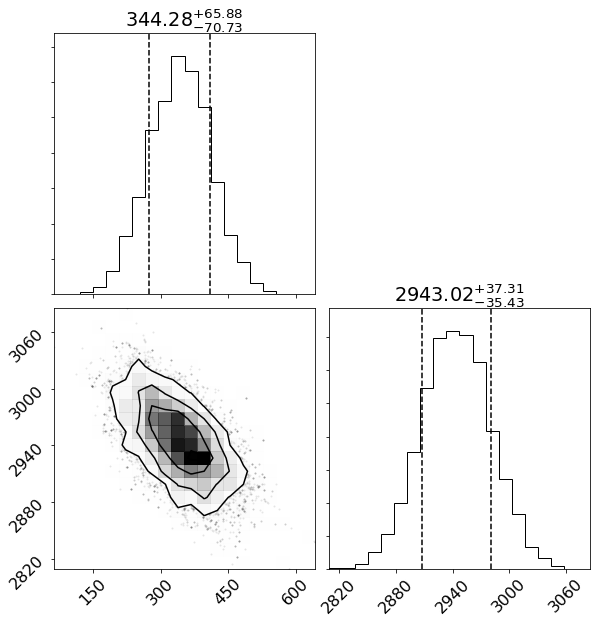

In [98]:
fig = corner.corner(samples7f[burnin*nwalkers:,:],
                    #labels=labels,
                    #truths=truths,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>And a final comparison with the input parameter $g = 50$ per second yields:</h3>

In [99]:
# extracting fit parameters (normalised to 10 second interval)
g_fit = spec_params_pg[0,0] / 10.
g_fit_err = spec_params_pg[0,1] / 10.
print('fitted rate: g = {0:.1f}+/-{1:.1f}'.format(g_fit,g_fit_err))
print('true rate:   g = {0:.1f}'.format(g))

fitted rate: g = 34.3+/-6.9
true rate:   g = 50.0


<h3>Looks like everything works out as expected.</h3>

<h3>Now, suppose we have $N=10$ energy bins $i$. Each of them as a certain light curve $D_i(t)$. In the case of the background, we can ignore that there is a certain connection between the energy bins (we don't know what this would be), i.e. we determine the background count rate, as before, for each of the $10$ bins for the time range of interest.<br>
    In the case of the sky (the GRB), there is a certain connection, which we can assume by using a spectral shape $F(E;\vec{p})$ with a set of certain spectral parameters $\vec{p}$, which we are now interested in (instead of the flux $F_i$ in each bin). For the sky spectrum, we have to consider that each energy bin has a finite size $dE_i$ (i.e. the flux cannot just be read off), and that there can be a contribution from higher energy photons, scattered to lower energy photons (i.e. we have an energy redistribution matrix - the spectral response, R(E_{measured},E_{initial}). Here, I need to go into a bit more detail because it is not obvious from what is going to happen, how this is handled:<br><br>
    We start from a spectral shape $F(E;K,\alpha)$, where I use the example of a power-law $F(E;K,\alpha) = \frac{dN}{dE dt dA} = KE^{\alpha}$, in physical (!) units of $\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$. Always remind yourself, that we are counting photons, so we need to convert that spectrum to the dataspace of our instrument, i.e. here counts.<br>
    Now comes the first step (1): We need to integrate the spectrum across our energy bins to convert the differential flux to a total flux (per energy bin), i.e.<br>
    $\frac{dN}{dt dA} \int_{E_{i}^{min}}^{E_{i}^{max}\,dE_i\d}KE_i^{\alpha}$, which one could to analytically here, but not needed for understanding. In the described case below, we do this integration by Simpson's 3/8 rule. We end up with units $\mathrm{ph\,cm^{-2}\,s^{-1}}$<br>
    In the next step (2), we take into account the effective area and the redistribution from higher energies to lower, i.e. we convert $\frac{dN}{dt dA}(E_{initial})$ to $\frac{dN}{dt}(E_{measured})$ by applying the matrix $R(E_{measured},E_{initial}$ to the vector $\frac{dN}{dt}(E_{initial})$. We end up with the new vector (rate spectrum) $\frac{dN}{dt}(E_i)$ for each energy bin $i$, now in units of $\mathrm{counts\,s^{-1}}$. Note the difference between photons per second from the spectral model to, now, counts per second (as we don't know if a count comes from this energy or a higher energy which was scattered down).<br>
    In the final step (3), we multiply by the exposure time (dead-time corrected if this applies) $T_{obs}$, so that finally, we expect $\mathrm{counts}(E_i)$ as a function of energy bin $i$, i.e. unitless.<br><br>
    Steps 1-3 is what is typically done by XSPEC. But since we don't have our things XSPEC-ready, yet (in general), and because we want to do polarisation at one point, I detail this out here.<br>
    In the following, I use an example from the COSI response (so that I don't have to invent a response). The details are not so important here, just note that the matrix, summed along the columns, gives the total effective area. As a spectral function, I use $F(E;K,\alpha) = \frac{dN}{dE dt dA} = KE^{\alpha}$ with $K = 10^8\,\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$ and $\alpha = -3.5$, and again an observation time of $T_{exp} = t_2 - t_1 = 10\,\mathrm{s}$. The energy bins (defined according to response, but can be arbitrary in general) are: $150, 220, 325, 480, 520, 765, 1120, 1650, 2350, 3450, 5000\,\mathrm{keV}$, i.e. $10$ logarithmic energy bins, with the 511 keV band as a special bin.<br>
    For the background we use the same function as above, but add a variation in energy:<br>
    $S(t,E;,s_0,\omega_0,\phi_0,s_1,\phi_1) = (s_0 + s_1E)(2 + \sin(\omega_0 t + (\phi_0 + \phi_1E)))$,<br><br>
    where $s_1$, $\phi_1$ now change the background as a function of energy (cf. function above where $s_1 = 0$ and $\phi_1 = 0$). For our example, we use $s_0 = 100\,\mathrm{ph\,s^{-1}}$, $\omega_0 = 0.1/2\pi \approx 0.016$ and $\phi_0 = \pi/3\,\mathrm{rad}$, $s_1 = -0.01\,\mathrm{ph\,s^{-1}\,keV^{-1}}$, $\phi_1 = -0.001\,\mathrm{rad\,keV^{-1}}$ and again $T_1 = 350\,\mathrm{s}$ and $T_2 = 450\,\mathrm{s}$ for the interesting region.

In [100]:
# definition of energy bins
energy_bin_edges=np.array([150,  220,  325,  480,  520,  765, 1120, 1650, 2350, 3450, 5000])

emin = energy_bin_edges[0:-1]
emax = energy_bin_edges[1:]
ecen = 0.5*(emax+emin)
ewid = (emax-emin)

n_e = len(ecen)

In [101]:
# true background over longer time scale

# as before
s0 = 100.
omega0 = 0.1/(2*np.pi)
phi0 = np.pi/3

# variation with energy
s1 = -0.01
phi1 = -0.001

# length of time array
n_t = len(t)

# fill true model array
S_true = np.zeros((n_t,n_e))
for i in range(n_e):
    S_true[:,i] = (s0 + s1*ecen[i])*(2 + np.sin(omega0*t + (phi0 + phi1*ecen[i])))

Text(0.5, 1.0, 'Range of interest [T1,T2]')

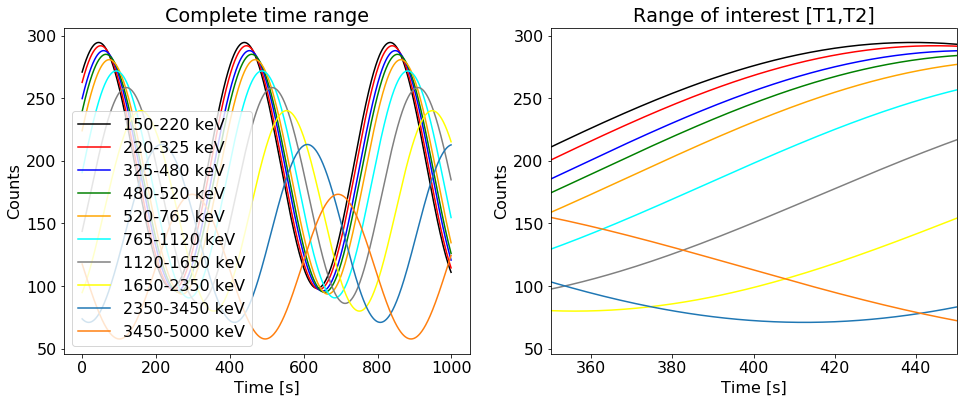

In [102]:
# plot light curves for all energies
plt.figure(figsize=(16,6))

plt.subplot(121)
for i in range(n_e):
    plt.plot(t,S_true[:,i],label='{0:1.0f}-{1:1.0f} keV'.format(emin[i],emax[i]))
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.legend()
plt.title('Complete time range')

plt.subplot(122)
plt.plot(t,S_true)
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.xlim(T1,T2)
plt.title('Range of interest [T1,T2]')

<h3>Now that we defined the true background, we go trough the spectral stuff in detail once, and then write it into a function that does all that at once. Parts of this are already included in COSIpy, so, in the end, the idea is to make what comes in the following as a generally as possible for COSIpy and GRBs.<br>
    We define our powerlaw:</h3>

In [103]:
def powerlaw(energy, p):
    """
    Returns:
    Differential flux shaped as power-law function "in units of ph/cm2/s/keV"

    Parameters:
    :param energy: 1D-array of energies where power-law is evaluated (in keV)
    :param p:      p[0] = Normalisation (in ph/cm2/s/keV)
    :param p:      p[1] = Power-law index (unitless)

    Misc:
    E0 = 1 keV  Pivotal energy, i.e. where the power-law is normalised at (in keV)
    """

    E0 = 1.

    return p[0]*np.power(energy/E0,p[1])

Text(0, 0.5, 'Flux [$\\mathrm{ph\\,cm^{-2}\\,s^{-1}\\,keV^{-1}}$]')

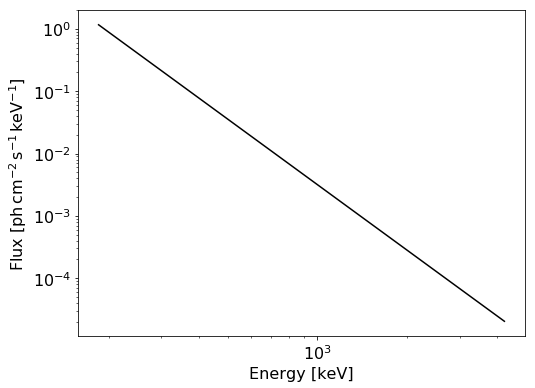

In [104]:
# true parameters (as in text)
true_params = [1e8,-3.5]

# calculate true model
true_model = powerlaw(ecen,true_params)

# and plot

plt.loglog(ecen,true_model)
plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

<h3>nothing special ...<br>
    Now the integration of the powerlaw:</h3>

In [105]:
def integrate_powerlaw(e_lo,e_hi,p):
    """
    integrate a power law function with simpson rule
    """
    return (e_hi-e_lo)/6.0*(powerlaw(e_lo,p)+4*powerlaw((e_hi+e_lo)/2.0,p)+powerlaw(e_hi,p))

<h3>You see how this is easily generalisable if one has a smooth function</h3>

<h3>$\mathrm{ph\,s^{-1}\,cm^{-2}\,keV^{-1}} \Rightarrow \mathrm{ph\,s^{-1}\,cm^{-2}}$:</h3>

In [106]:
plaw_true_fluxes = integrate_powerlaw(emin, emax, true_params)

In [107]:
def step_plot(x_edges,y_vals,plot_label='',**kwargs):
    """
    A nicer version of the matplotlib.pyplot.step function that shows all bins completely
    """
    n_x = len(y_vals)

    x_min = x_edges[0:-1]
    x_max = x_edges[1:]

    # loop over all x values
    for i in range(n_x-1):
        plt.plot([x_min[i],x_min[i+1]],np.repeat(y_vals[i],2),**kwargs)
        if ((i >= 0) & (i < n_x-1)):
            plt.plot(np.repeat(x_min[i+1],2),[y_vals[i],y_vals[i+1]],**kwargs)
    plt.plot([x_max[-2],x_max[-1]],np.repeat(y_vals[-1],2),**kwargs,label=plot_label)

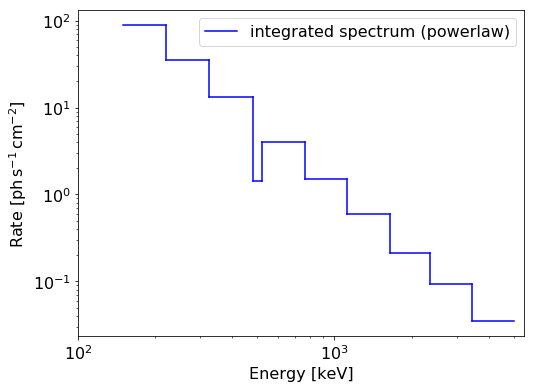

In [108]:
# integrated flux
step_plot(energy_bin_edges,plaw_true_fluxes,plot_label='integrated spectrum (powerlaw)',color='blue',linestyle='-')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Rate [$\mathrm{ph\,s^{-1}\,cm^{-2}}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,5500)
plt.legend()

<h3>Note here, that the 511 keV bin is not wrong: the bin size is just so much smaller than for the neighbouring bins, that the counts integrated over this bin is smaller.<br>
    Now the redistribution (I read a prepared COSI response in, to show the process:</h3>

In [109]:
with np.load('COSI_rmf_zenith.npz') as content:
    rmf = content['rmf']

Text(0.5, 0, 'Initial Energy [keV]')

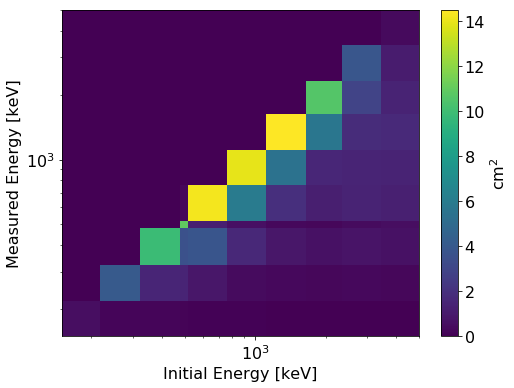

In [110]:
plt.pcolormesh(energy_bin_edges,energy_bin_edges,rmf)
plt.colorbar(label=r'$\mathrm{cm^{2}}$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Measured Energy [keV]')
plt.xlabel('Initial Energy [keV]')

<h3>$\mathrm{ph\,s^{-1}\,cm^{-2}} \Rightarrow \mathrm{cnts\,s^{-1}}$:</h3>

In [111]:
plaw_folded_counts = np.dot(rmf,plaw_true_fluxes)

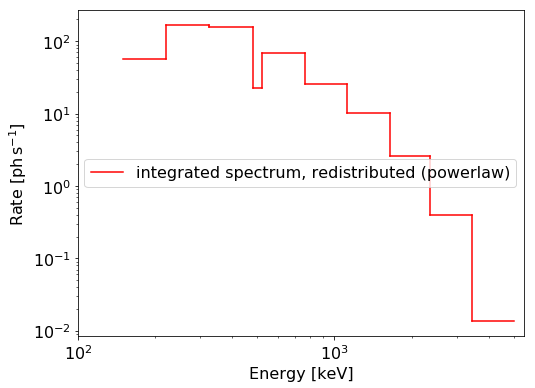

In [112]:
# integrated flux
step_plot(energy_bin_edges,plaw_folded_counts,
          plot_label='integrated spectrum, redistributed (powerlaw)',
          color='red',linestyle='-')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Rate [$\mathrm{ph\,s^{-1}}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,5500)
plt.legend()

<h3>Note, how the decreasing effective area for lower energies decreases the number of expected counts! Remember, this is actually a powerlaw.</h3>

<h3>And finally, multiplying by the time to<br>
    $\mathrm{cnts\,s^{-1}} \Rightarrow \mathrm{cnts}$:</h3>

In [113]:
plaw_total_folded_counts_true = plaw_folded_counts*dt

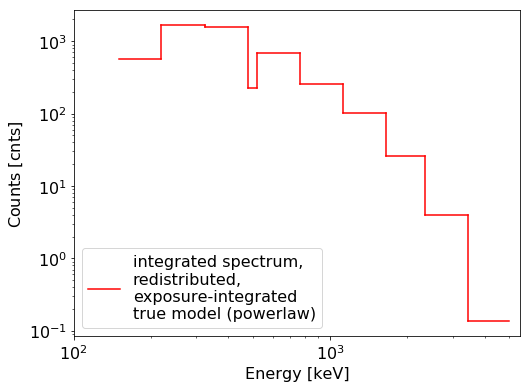

In [114]:
# integrated flux
step_plot(energy_bin_edges,plaw_total_folded_counts_true,
          plot_label='integrated spectrum,\nredistributed,\nexposure-integrated\ntrue model (powerlaw)',
          color='red',linestyle='-')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Counts [$\mathrm{cnts}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(100,5500)
plt.legend()

<h3>Now, this last plot is what we <em>>actually</em> fit to our Poison-distributed count data. Here, it is very important to note that we <em>predict</em> less than one count for energies larger than 3 MeV. This doesn't mean that this is bogus (as shown in the very first example), but that our instrument expects only in the rarest cases a photon or two.<br>
    In this particular example, the expected rate for the second to last bin is $m_{10} = 0.135$ (counts per 10 seconds), so that we can calculate the probability to measure $0$, $1$, $2$, ... counts, given this expectation: the Poisson distribution tells us: $P(d=\{0,1,2,3,...\},m_{10}) = ...$ (see below).<br>
    The effect becomes clearer when we draw more than one Poisson sample of our true model and see how often we get counts in this bin, etc.</h3>

In [115]:
m10 = plaw_total_folded_counts_true[-1]
m10

0.13482909120440573

In [116]:
from scipy.stats import poisson

Text(0, 0.5, 'Cumulative probaility')

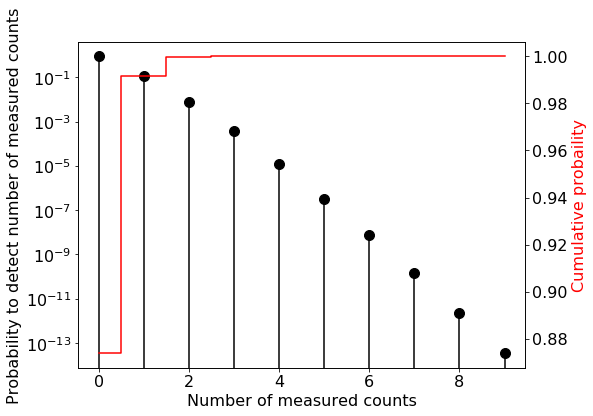

In [117]:
# calculating probability for 0 ... 9 counts given an expectation of 0.398
prob10 = poisson.pmf(np.arange(10),m10)

# and plotting
plt.plot(np.arange(10),prob10,'ko',markersize=10)
for p in range(10):
    plt.plot([p,p],[0,prob10[p]],color='black')
    
plt.yscale('log')

plt.xlabel('Number of measured counts')
plt.ylabel('Probability to detect number of measured counts')

plt.twinx()
plt.step(np.arange(10),np.cumsum(prob10),color='red',where='mid')
plt.ylabel('Cumulative probaility',color='red')

In [118]:
prob10

array([8.73865250e-01, 1.17822458e-01, 7.94294744e-03, 3.56980128e-04,
       1.20328266e-05, 3.24475014e-07, 7.29144521e-09, 1.40442704e-10,
       2.36697028e-12, 3.54596057e-14])

<h3>Now we combine the true data sets (as above) and draw a Poisson sample that we will use as our (simulated) data set:</h3>

In [119]:
# find our measurements (as above)
idx = np.where((t>=T1) & (t<T2))[0]

# new arrays 
tt = t[idx]

# background
# change: also energy dimension included
st = S_true[idx,:]

# GRB
gdx = np.where((tt>=t1) & (tt<t2))[0]

# change: g is now an array instead of one value
g = plaw_total_folded_counts_true/dt
gt = np.zeros((len(tt),n_e))
for i in range(n_e):
    gt[gdx,i] = g[i]

true_total_model = st + gt    

# sampling a data set ('simulate') by drawing Poisson samples:
d = np.random.poisson(true_total_model)

In [120]:
d.shape

(100, 10)

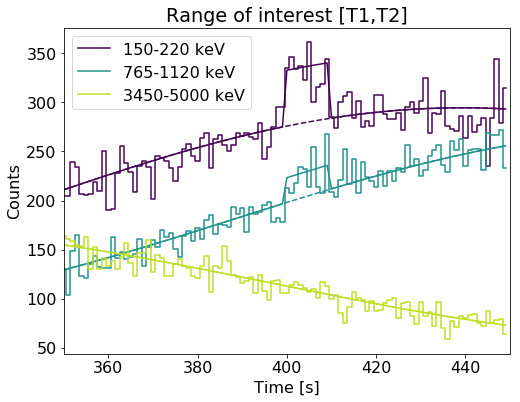

In [121]:
for i in [0,5,9]:
    plt.plot(tt,true_total_model[:,i],label='{0:1.0f}-{1:1.0f} keV'.format(emin[i],emax[i]),color=plt.cm.viridis(1/n_e*i))
    plt.plot(tt,st[:,i],color=plt.cm.viridis(1/n_e*i),linestyle='--')
    plt.step(tt,d[:,i],where='mid',color=plt.cm.viridis(1/n_e*i))
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.xlim(T1,T2)
plt.title('Range of interest [T1,T2]')
plt.legend()

<h3>You see how complex the data set now becomes. In the plot above I show the light curves for three energy bands, and you can see how the true signal would be inditinguishable from the background in the highest energy bin.<br>
    Before we set up the full model, we determine the $10$ (one for each energy bin) background estimates plus their uncertainties. You see that, for example inm the case of $765$-$1120$ keV, we wouldn't necessarily need to fit a parabola, and a straight line would be enough for the background. For consistency, I will fit all light curves with a parabola as above:</h3>

In [122]:
# loop over the 10 energy bins to get B and sigma_B for all light curves
# everything is the same, just the bin changes


ndim = 3
# array to save things in
spec_params10 = np.zeros((n_e,ndim,7))

for e in range(n_e):

    print('#############')
    print('Fitting bin {0:1.0f}: {1:1.0f}-{2:1.0f} keV: ...'.format(e,emin[e],emax[e]))
    
    init = np.array([2000,1.,0.0001])
    init_var = init*1e-4

    ndim, nwalkers = 3, 10
    pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

    sampler8 = emcee.EnsembleSampler(nwalkers,
                                     ndim,
                                     parabola_with_area_fit,
                                     args = (tt[bdx],
                                             d[bdx,e], # changed here
                                             t1,
                                             t2))

    # do the actual Monte Carlo sampling for 2000 iterations
    iters = 2000
    _ = sampler8.run_mcmc(pos, iters, progress=True)

    samples8 = sampler8.get_chain()
    samples8f = sampler8.flatchain

    # output here
    # see explanation below for what is actually happening

    print('\n')
    print('Results:\n')

    # formatting the table
    row_format ='{:>10}' * 8

    # first table row
    print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

    for i in range(ndim):
        mean_val   = np.mean(samples8[burnin:,:,i])
        std_val    = np.std(samples8[burnin:,:,i])
        median_val = np.median(samples8[burnin:,:,i])
        ub1_val    = np.percentile(samples8[burnin:,:,i],50+68.3/2)
        lb1_val    = np.percentile(samples8[burnin:,:,i],50-68.3/2)
        ub3_val    = np.percentile(samples8[burnin:,:,i],50+99.73/2)
        lb3_val    = np.percentile(samples8[burnin:,:,i],50-99.73/2)
        spec_params10[e,i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

        print(row_format.format(str(i)+':',
                                str('%1.2e' % mean_val),
                                str('%1.2e' % std_val),
                                str('%1.2e' % lb3_val),
                                str('%1.2e' % lb1_val),
                                str('%1.2e' % median_val),
                                str('%1.2e' % ub1_val),
                                str('%1.2e' % ub3_val)))

  5%|▌         | 100/2000 [00:00<00:01, 995.71it/s]

#############
Fitting bin 0: 150-220 keV: ...


  6%|▌         | 123/2000 [00:00<00:01, 1223.57it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.75e+03  3.83e+01  2.64e+03  2.71e+03  2.75e+03  2.79e+03  2.86e+03
        1:  8.88e+00  2.24e+00  2.43e+00  6.64e+00  8.86e+00  1.11e+01  1.55e+01
        2: -1.01e-02  2.81e-03 -1.83e-02 -1.29e-02 -1.01e-02 -7.27e-03 -2.07e-03
#############
Fitting bin 1: 220-325 keV: ...


  6%|▌         | 122/2000 [00:00<00:01, 1211.34it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.67e+03  3.61e+01  2.56e+03  2.63e+03  2.67e+03  2.70e+03  2.77e+03
        1:  5.77e+00  2.19e+00 -4.60e-01  3.51e+00  5.78e+00  8.02e+00  1.25e+01
        2: -5.95e-03  2.74e-03 -1.44e-02 -8.77e-03 -5.96e-03 -3.10e-03  1.88e-03
#############
Fitting bin 2: 325-480 keV: ...


  6%|▌         | 117/2000 [00:00<00:01, 1163.46it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.63e+03  3.69e+01  2.51e+03  2.59e+03  2.62e+03  2.66e+03  2.74e+03
        1:  9.39e+00  2.07e+00  3.05e+00  7.35e+00  9.38e+00  1.15e+01  1.63e+01
        2: -1.04e-02  2.60e-03 -1.89e-02 -1.29e-02 -1.03e-02 -7.79e-03 -2.40e-03
#############
Fitting bin 3: 480-520 keV: ...


  6%|▌         | 116/2000 [00:00<00:01, 1157.67it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.48e+03  3.42e+01  2.38e+03  2.45e+03  2.48e+03  2.52e+03  2.60e+03
        1:  4.55e+00  2.11e+00 -9.57e-01  2.43e+00  4.47e+00  6.71e+00  1.19e+01
        2: -4.23e-03  2.64e-03 -1.35e-02 -6.91e-03 -4.12e-03 -1.57e-03  2.73e-03
#############
Fitting bin 4: 520-765 keV: ...


  6%|▋         | 125/2000 [00:00<00:01, 1248.29it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.33e+03  3.39e+01  2.24e+03  2.30e+03  2.33e+03  2.37e+03  2.43e+03
        1:  4.41e+00  1.99e+00 -1.66e+00  2.39e+00  4.40e+00  6.44e+00  1.05e+01
        2: -4.01e-03  2.50e-03 -1.16e-02 -6.56e-03 -3.99e-03 -1.49e-03  3.53e-03
#############
Fitting bin 5: 765-1120 keV: ...


  6%|▋         | 129/2000 [00:00<00:01, 1282.78it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  2.03e+03  3.11e+01  1.94e+03  2.00e+03  2.03e+03  2.06e+03  2.12e+03
        1:  1.73e+00  1.81e+00 -3.52e+00 -7.77e-02  1.67e+00  3.53e+00  7.14e+00
        2: -4.58e-04  2.28e-03 -7.25e-03 -2.70e-03 -3.81e-04  1.80e-03  6.10e-03
#############
Fitting bin 6: 1120-1650 keV: ...


  4%|▍         | 77/2000 [00:00<00:02, 761.32it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  1.57e+03  2.76e+01  1.47e+03  1.54e+03  1.57e+03  1.59e+03  1.65e+03
        1: -1.78e+00  1.67e+00 -6.47e+00 -3.45e+00 -1.81e+00 -6.02e-02  3.34e+00
        2:  3.87e-03  2.10e-03 -2.62e-03  1.71e-03  3.91e-03  5.98e-03  9.70e-03
#############
Fitting bin 7: 1650-2350 keV: ...


  0%|          | 0/2000 [00:00<?, ?it/s]/Users/thomassiegert/.virtualenvs/testing/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
  6%|▌         | 115/2000 [00:00<00:01, 1141.39it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  1.03e+03  2.24e+01  9.68e+02  1.01e+03  1.03e+03  1.05e+03  1.10e+03
        1: -6.00e+00  1.38e+00 -9.91e+00 -7.38e+00 -6.03e+00 -4.60e+00 -1.47e+00
        2:  8.44e-03  1.73e-03  2.78e-03  6.69e-03  8.47e-03  1.02e-02  1.33e-02
#############
Fitting bin 8: 2350-3450 keV: ...


  6%|▌         | 114/2000 [00:00<00:01, 1132.34it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  7.29e+02  2.17e+01  6.69e+02  7.07e+02  7.29e+02  7.51e+02  7.97e+02
        1: -5.75e+00  1.32e+00 -9.66e+00 -7.10e+00 -5.76e+00 -4.42e+00 -1.84e+00
        2:  6.96e-03  1.64e-03  2.08e-03  5.30e-03  6.97e-03  8.64e-03  1.18e-02
#############
Fitting bin 9: 3450-5000 keV: ...


100%|██████████| 2000/2000 [00:01<00:00, 1207.42it/s]



Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  1.08e+03  2.38e+01  1.01e+03  1.06e+03  1.08e+03  1.11e+03  1.16e+03
        1: -6.77e-01  1.45e+00 -5.06e+00 -2.08e+00 -6.85e-01  7.47e-01  3.56e+00
        2: -2.16e-04  1.80e-03 -5.45e-03 -2.00e-03 -2.03e-04  1.53e-03  5.26e-03


In [123]:
# extracting the parameters
B_arr = spec_params10[:,0,0]
sigma_B_arr = spec_params10[:,0,1]

<h3>In fact, we determined the background spectrum of our time of interest, see next plot:</h3>

Text(0, 0.5, 'Background rate between $t_1$ and $t_2$')

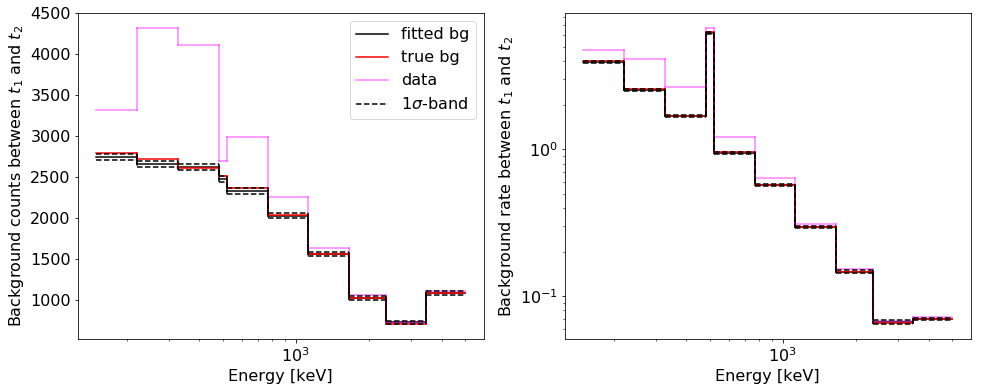

In [124]:
plt.figure(figsize=(16,6))

plt.subplot(121)
step_plot(energy_bin_edges,B_arr,color='black',plot_label='fitted bg')
step_plot(energy_bin_edges,np.sum(st[gdx,:],axis=0),color='red',plot_label='true bg')
step_plot(energy_bin_edges,np.sum(d[gdx,:],axis=0),color='magenta',plot_label='data',alpha=0.5)
step_plot(energy_bin_edges,B_arr+sigma_B_arr,color='black',linestyle='--',plot_label=r'$1\sigma$-band')
step_plot(energy_bin_edges,B_arr-sigma_B_arr,color='black',linestyle='--')
plt.xscale('log')
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel(r'Background counts between $t_1$ and $t_2$')

plt.subplot(122)
step_plot(energy_bin_edges,B_arr/ewid/dt,color='black')
step_plot(energy_bin_edges,np.sum(st[gdx,:],axis=0)/ewid/dt,color='red')
step_plot(energy_bin_edges,np.sum(d[gdx,:],axis=0)/ewid/dt,color='magenta',plot_label='data',alpha=0.5)
step_plot(energy_bin_edges,(B_arr+sigma_B_arr)/ewid/dt,color='black',linestyle='--')
step_plot(energy_bin_edges,(B_arr-sigma_B_arr)/ewid/dt,color='black',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [keV]')
plt.ylabel(r'Background rate between $t_1$ and $t_2$')

<h3>Similar to above, we could now extract the count rate in each bin and then fit the extracted spectrum in a second step (you should do this to see what's the difference!). Instead, we set up a fit of the now $10$ data points with the Poisson-Gaussian likelihood (PGSTAT), and the forward folding of the spectral model:</h3>

In [125]:
# definition of data set (central time bin we masked out, as above)
d_GRB = np.sum(d[gdx,:],axis=0)

# plot is above (magenta line is that data)

In [126]:
# a similar but more general version is availble in COSIpy already, though without PGSTAT

def COSI_model_fit_powerlaw_pgstat(theta, x, data, dx, rsp, e_lo, e_hi, dt, B_arr, sigma_B_arr, eval=False):
    """
    Returns:
    PGSTAT for spectral count data with normally distributed background estimates
    powerlaw spectral model, accounting for the spectral response.
    Or, with eval=True, the output model in data space (in units of cnts/s/keV)

    Parameters:
    :param theta:     Array of to-be-fitted parameters used in combination with defined 'function'
    :param x:         Energy array (dim=(n,); in keV)
    :param data:      Counts array (dim=(n,); in cnts)
    :param dx:        Energy bin sizes for x (dim=(n,); in keV)
    :param rsp:       Response matrix that fits to the dimensions of x (and dx, y; dim=(m,n);, units cm2 something)
    :param e_lo:      Lower interpolated energy edges for response calculation(dim=(m,); in keV)
    :param e_hi:      Upper interpolated energy edges for response calculation(dim=(m,); in keV)
    :param dt:        Exposure time in units of s
    :param B_arr:     array of background estimates
    :param sigma_B_arr: array of background estimate uncertainties
    """

    # Integrate model with Simpson's rule over the interpolated energy bins
    # this works in general for smooth models, but not for cuts, steps or models 'within one bin', etc.
    # (energy)
    K = theta[0]
    alpha = theta[1]
    integrated_model = integrate_powerlaw(e_lo,e_hi,[K,alpha])

    # Apply response matrix (area)
    folded_model = np.dot(integrated_model,rsp.T)

    # Return to differential model (time)
    folded_model_tot = folded_model * dt

    # and now adding background estimates:
    bg_level = theta[2:]
    
    # and adding to a total model (same as above "g + b")
    model = folded_model_tot + bg_level
    
    # Evaluate
    if eval==False:

        stat = np.sum(data*np.log(model) - model - 0.5*((bg_level - B_arr)/(sigma_B_arr))**2)
        if np.isfinite(stat):
            return stat
        else:
            return -np.inf
        
    # or return the folded model itself at a certain set of parameters
    else:
        return folded_model_tot

<h3>Let's see if this works:</h3>

In [127]:
# fitting the spectrum(!)

# now need two inits for spsectral K and alpha, plus 10 for background
init = np.array([1e7,-3]+list(B_arr))
init_var = init*1e-4

ndim, nwalkers = 12, 40
pos = [init + np.random.randn(ndim)*init_var for i in range(nwalkers)]

sampler9 = emcee.EnsembleSampler(nwalkers,
                                 ndim,
                                 COSI_model_fit_powerlaw_pgstat,
                                 args = (ecen,
                                         d_GRB,
                                         ewid,
                                         rmf,
                                         emin,
                                         emax,
                                         dt,
                                         B_arr,
                                         sigma_B_arr))

# do the actual Monte Carlo sampling for 10000 iterations
# lots of parameters, so I use more walkers and more interations
iters = 10000
_ = sampler9.run_mcmc(pos, iters, progress=True)

samples9 = sampler9.get_chain()
samples9f = sampler9.flatchain

# output here
# see explanation below for what is actually happening

print('\n')
print('Results:\n')

spec_params_spec = np.zeros((ndim,7))

# formatting the table
row_format ='{:>10}' * 8

# first table row
print(row_format.format(*['Parameter','mean','std','0.15','15.85','50.00','84.15','99.85']))

for i in range(ndim):
    mean_val   = np.mean(samples9[burnin:,:,i])
    std_val    = np.std(samples9[burnin:,:,i])
    median_val = np.median(samples9[burnin:,:,i])
    ub1_val    = np.percentile(samples9[burnin:,:,i],50+68.3/2)
    lb1_val    = np.percentile(samples9[burnin:,:,i],50-68.3/2)
    ub3_val    = np.percentile(samples9[burnin:,:,i],50+99.73/2)
    lb3_val    = np.percentile(samples9[burnin:,:,i],50-99.73/2)
    spec_params_spec[i,:] = [mean_val,std_val,lb3_val,lb1_val,median_val,ub1_val,ub3_val]

    print(row_format.format(str(i)+':',
                            str('%1.2e' % mean_val),
                            str('%1.2e' % std_val),
                            str('%1.2e' % lb3_val),
                            str('%1.2e' % lb1_val),
                            str('%1.2e' % median_val),
                            str('%1.2e' % ub1_val),
                            str('%1.2e' % ub3_val)))

100%|██████████| 10000/10000 [00:34<00:00, 286.19it/s]




Results:

 Parameter      mean       std      0.15     15.85     50.00     84.15     99.85
        0:  1.59e+08  1.05e+08  9.84e+06  6.35e+07  1.39e+08  2.47e+08  5.83e+08
        1: -3.55e+00  1.27e-01 -3.81e+00 -3.66e+00 -3.56e+00 -3.43e+00 -3.12e+00
        2:  2.75e+03  3.38e+01  2.65e+03  2.72e+03  2.75e+03  2.78e+03  2.85e+03
        3:  2.67e+03  3.58e+01  2.56e+03  2.63e+03  2.67e+03  2.70e+03  2.77e+03
        4:  2.62e+03  3.43e+01  2.52e+03  2.59e+03  2.62e+03  2.66e+03  2.73e+03
        5:  2.48e+03  2.85e+01  2.40e+03  2.46e+03  2.48e+03  2.51e+03  2.57e+03
        6:  2.33e+03  3.27e+01  2.24e+03  2.30e+03  2.34e+03  2.37e+03  2.43e+03
        7:  2.03e+03  2.73e+01  1.95e+03  2.00e+03  2.03e+03  2.06e+03  2.12e+03
        8:  1.56e+03  2.31e+01  1.49e+03  1.54e+03  1.56e+03  1.58e+03  1.63e+03
        9:  1.03e+03  1.87e+01  9.78e+02  1.02e+03  1.04e+03  1.05e+03  1.09e+03
       10:  7.33e+02  1.67e+01  6.83e+02  7.17e+02  7.33e+02  7.51e+02  7.84e+02
       11:  1.09

In [128]:
# evaluate models according to sampling

# we calculate only the last 100 samples from each walker,
# because it will just take forever otherwise
n_use = 100
n_plot_samples = nwalkers*n_use

# we thus have 1000 model realisations for each of the 10 energy bins
y_models9 = np.zeros((n_e,n_plot_samples))

# though, now we have two data spaces, and we need to calculate the smooth powerlaw model separately
x_model9_sm = np.logspace(2,4,100)
y_models9_sm = np.zeros((100,n_plot_samples))

last_x_samples = iters-n_use

for i in range(nwalkers*last_x_samples,nwalkers*last_x_samples+n_plot_samples):
    y_models9[:,i-nwalkers*last_x_samples] = COSI_model_fit_powerlaw_pgstat(samples9f[i,:],
                                                                            ecen,
                                                                             d_GRB,
                                                                             ewid,
                                                                             rmf,
                                                                             emin,
                                                                             emax,
                                                                             dt,
                                                                             B_arr,
                                                                             sigma_B_arr,
                                                                            eval=True)
    y_models9_sm[:,i-nwalkers*last_x_samples] = powerlaw(x_model9_sm,[samples9f[i,0],samples9f[i,1]])

<h3>Fancy plot with all the information that we got now:</h3>

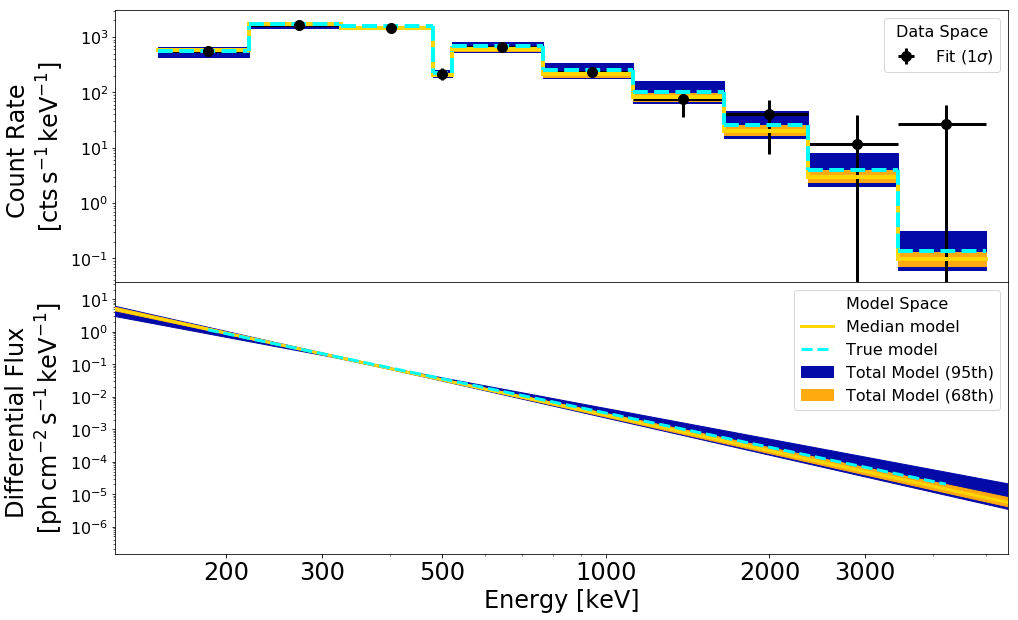

In [129]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,10))


ax[0].errorbar(ecen,
               d_GRB-B_arr,
               xerr=ewid/2,
               yerr=np.sqrt(d_GRB), # as you now know, this is the wrong error bar, just plotting here...
               fmt='o',linewidth=3,color='black',markersize=10,
               label=r'Fit ($1\sigma$)')


tot_fit_model = np.median(y_models9[:,:],axis=1)

true_data_space_model = np.sum(gt[gdx,:],axis=0)

for i in range(n_e):
    level = 95.4
    ax[0].fill_between([ecen[i]-ewid[i]/2,ecen[i]+ewid[i]/2],
                       np.repeat(np.percentile(y_models9[i,:], 50 - 0.5*level),2),
                       np.repeat(np.percentile(y_models9[i,:], 50 + 0.5*level),2),
                       color='xkcd:cobalt blue',alpha=1.0,step='mid')

    level = 68.3
    ax[0].fill_between([ecen[i]-ewid[i]/2,ecen[i]+ewid[i]/2],
                       np.repeat(np.percentile(y_models9[i,:], 50 - 0.5*level),2),
                       np.repeat(np.percentile(y_models9[i,:], 50 + 0.5*level),2),
                       color='xkcd:yellowish orange',alpha=1,step='mid')


    ax[0].plot([ecen[i]-ewid[i]/2,ecen[i]+ewid[i]/2],
               np.repeat(tot_fit_model[i],2),
               linewidth=4,color='gold')
    ax[0].plot([ecen[i]-ewid[i]/2,ecen[i]+ewid[i]/2],
               np.repeat(true_data_space_model[i],2),
               linewidth=4,color='cyan',linestyle='--')
    if i != n_e-1:
        ax[0].plot([ecen[i]+ewid[i]/2,ecen[i+1]-ewid[i+1]/2],
                   [tot_fit_model[i],tot_fit_model[i+1]],
                   linewidth=4,color='gold')
        ax[0].plot([ecen[i]+ewid[i]/2,ecen[i+1]-ewid[i+1]/2],
                   [true_data_space_model[i],true_data_space_model[i+1]],
                   linewidth=4,color='cyan',linestyle='--')
        
ax[0].set_xlabel('')
ax[0].set_ylabel('Count Rate \n'+r'[$\mathrm{cts\,s^{-1}\,keV^{-1}}$]',fontsize=24)

ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[0].set_xlim(125,5500)
ax[0].xaxis.set_ticks([])




ax[0].legend(title='Data Space')

level = 95.4
ax[1].fill_between(x_model9_sm,
                   np.percentile(y_models9_sm[:,:], 50 - 0.5*level,axis=1),
                   np.percentile(y_models9_sm[:,:], 50 + 0.5*level,axis=1),
                   color='xkcd:cobalt blue',alpha=1.0,label='Total Model (95th)',zorder=1000)

level = 68.3
ax[1].fill_between(x_model9_sm,
                   np.percentile(y_models9_sm[:,:], 50 - 0.5*level,axis=1),
                   np.percentile(y_models9_sm[:,:], 50 + 0.5*level,axis=1),
                   color='xkcd:yellowish orange',alpha=1.0,label='Total Model (68th)',zorder=1000)




ax[1].plot(x_model9_sm,np.percentile(y_models9_sm[:,:], 50,axis=1),color='gold',linewidth=3,zorder=1000,label='Median model')
ax[1].plot(ecen,true_model,color='cyan',linewidth=3,zorder=1000,label='True model',linestyle='--')

ax[1].set_xlabel('Energy [keV]',fontsize=24)
ylabel_text = 'Differential Flux \n'+r'[$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]'
ax[1].set_ylabel(ylabel_text,fontsize=24)

ax[1].set_yscale('log')
ax[1].set_xscale('log')

ax[1].set_xlim(125,5500)
#ax[1].ylim(1e-8,1e-3)

ax[1].legend(title='Model Space')

ax[1].xaxis.set_ticks([200,300,500,1000,2000,3000])
ax[1].xaxis.set_ticklabels([200,300,500,1000,2000,3000],fontsize=24)

plt.subplots_adjust(hspace=0)

<h3>And finally checking if the fitted spectral parameters are indeed the ones we put in:</h3>

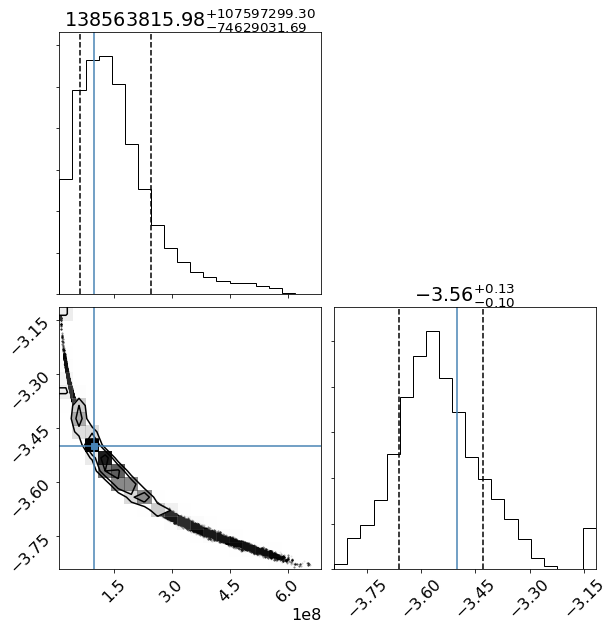

In [130]:
fig = corner.corner(samples9f[burnin*nwalkers:,0:2],
                    #labels=labels,
                    truths=true_params,
                    quantiles=[0.1585,0.8415],
                    show_titles=True)
fig.set_size_inches(10,10)

<h3>Looks like we get out what we put in.<br>
    Now your first step would be playing around with the input variables, and once you figured that out in general, I will show you COSIpy and you can do at least this already for the one COSI GRB.</h3>